# Data Science Project: Assessment 3

Student ID: 201579160

This assessment has a 60% weight.

This notebook, its images and the related external files (i.e. data source, rapidminer models etc.) are also available at: https://github.com/lacibacsi/data_science_assignment_3

## Case study

BitsBank wants to catch suspicious credit card transactions for further fraud investigation. The bank decided to invest in a new system and tasked you with the mission of building a prediction model that is capable of detecting potential fraudulent transactions. Their budget for the system is £1million. The bank provided us with their historical transactions data. Each record constitutes a set of attributes for each transaction with a flag of either being normal or fraudulent. The original attributes have been passed through a PCA process that gave the set of features that we see in the dataset. This has been done for two reasons: firstly to reduce the dimensionality of the dataset, and secondly to anonymise the information of their customers. Fraudulent cases constitute a small percentage of the overall transactions. [The dataset can be downloaded here](https://minerva.leeds.ac.uk/bbcswebdav/xid-18675934_4).  

Each case that is nominated by your predictive model to be fraudulent and turns out to be not fraudulent costs the bank around £1k. Such cases harm the bank’s customer satisfaction ratings. 

Each case that is not nominated by your predictive model to be fraudulent and turns out to be fraudulent costs the bank £10k on average. Such cases harm the bank’s reputation and costs them future customers. 

Their main requirements are: 

1. to catch at least 90% of actual fraudulent cases 

2. to ensure that at least 70% of the predicted cases for further investigation are actually fraudulent.

On top of the formal requirements, BitsBank have supplied more budgetary information that should guide development of the system. Each non-detected case of fraud costs the bank on average £10k and causes much more harm to their reputation and market share. On the other hand, incorrectly nominating a transaction as fraudulent costs the bank £1k. BitsBank has set aside budgets of £50k and £30k for these error types respectively. The classifiers developed should aim to keep the number of these errors to within the specified budgets. 

## 1. Aims, objectives and plan

### a) Aims and objectives (2 marks)
The aim of the assignment is to build a model that - based on the available data -- is able to predict and asses if an unseen credit card transaction is fraudulent or not. This prediction should be good enough to capture (predict) 90% of actual fraudulent cases and that at least 70% of the predicted fraud is correct. The model has to operate within the allowed budget of £1 million

- The detailed objectives are:
    - Analyse and pre-process the data. including cleaning, filling or removing missing or duplicate data, removing unneeded attributes or rescaling others if relevant. The outcome of this objective should be a dataset that is usable for training and testing different models.
    - Analyse the class-imbalance problem and propose constraints and steps (i.e. for train-test separation) for the subsequent objectives
    - Build and train a model using **decision trees** and the data and constraints from the previous steps. 
        - Split the data into test and train parts. 
        - Build, train, and test the model 
        - Tune the parameters so that the model does not under-fit or overfit the data. 
        - Visualise results and measure the performance of the model
        - cross-validate the model and compare results and performance with and without cross-validation
    - Build and train a model using **k nearest neighbours** and the data and constraints from the previous steps
        - Split the data into test and train parts. 
        - Build, train, and test the model 
        - Tune the parameters so that the model does not under-fit or overfit the data. 
        - Visualise results and measure the performance of the model
        - cross-validate the model and compare results and performance with and without cross-validation
    - compare two classification models and select the one with the better overall performance
        - use F1 as well as accuracy metrics to assess the performance of the model
        - recommend a model with parameters to the Bank that satisfies the original perfomance goals
        - Calculate the estimated price of the model running the full data set and ensure that it fits the allowed budget
    - Analyse the solution and propose next steps


###  b) Plan (2 marks)

Below is a simplified - admittedly rather sequential - project plan on how I executed the task. Please note that day do not represent valid task lenghts as one would expect from a proper project plan, estimated days are more of an indication of expected complexity and length


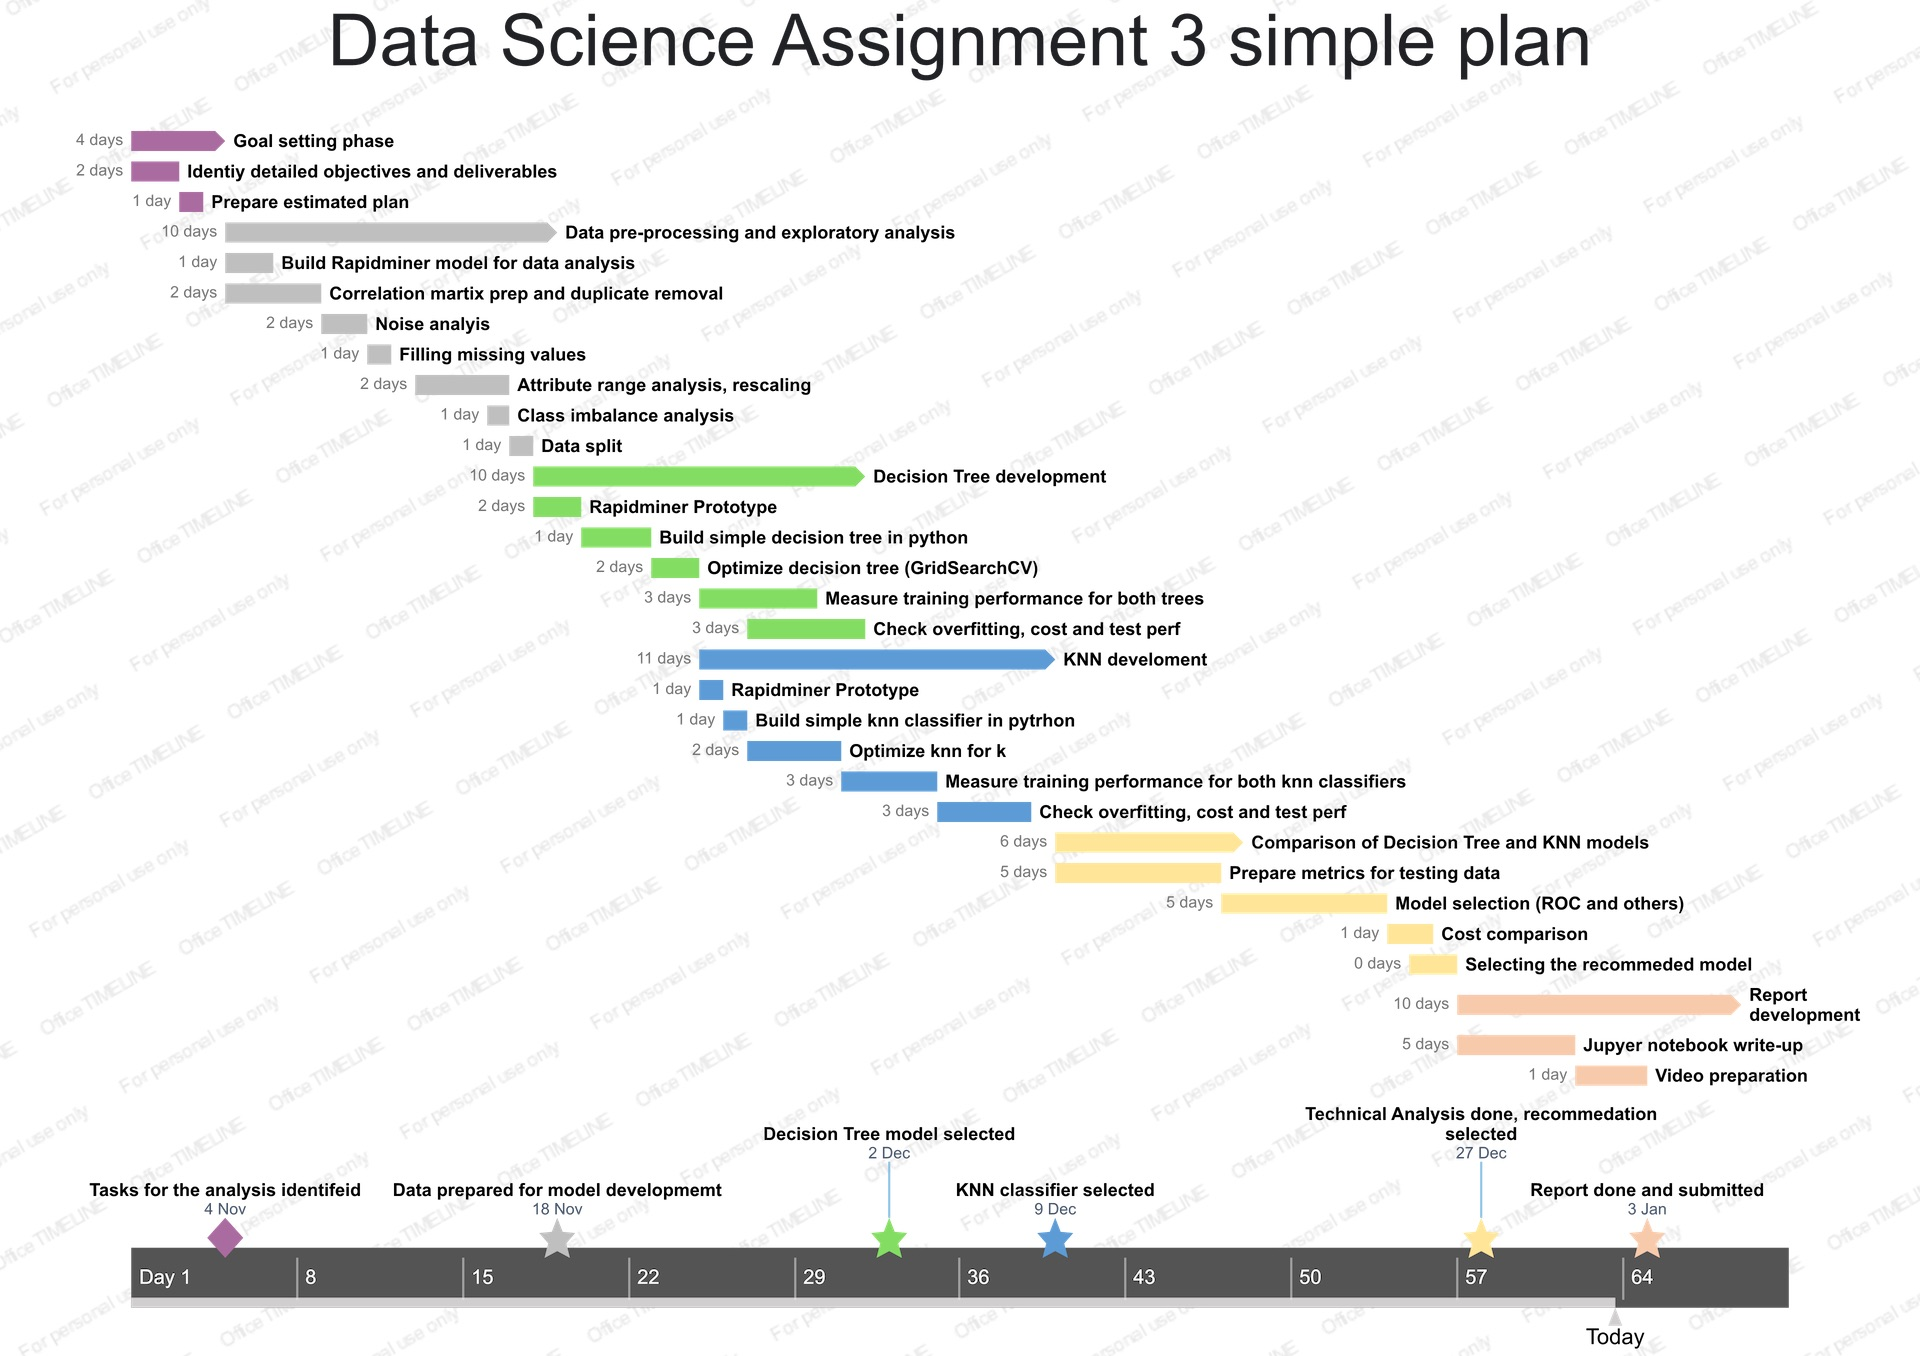

## 2. Understanding the case study

###  Case study analysis (8 marks)
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)

Based on the description, the following statements, requirements and key points can be made:

   - the input dataset is already anonymous and has been run through a PCA analysis so no further steps are needed to make the data anonymous
   - the input data may contain missing values and other impurities and hence need to be analysed and cleansed if needed
   - the input dataset is **labelled**, so **supervised learning** will be applied. 
   - a **predictive model** needs to be built that can **classify** unseen transactions as fraudulent or not
       - a decision tree and a k nearest neighbour will be trained
       - all models will use a 70%-30% train and test split
       - hyper parameter optimisation will be run on both to find a potentially improved model
   - the model has to have 
       - at least 90% detect plus metrics
       - at least 70% predict plus metrics
       - the model's confusion matrix will provide these calculations      
   - the model has to be performant:
       - accuracy and F1 scores will be calculated   
       - models will be checked for overfitting by tuning hyperparameters and assessing train-test accuracy differences and changes     
   - the model errors cost money but not to equal amount:
       - false positives cost £1k
       - false negatives cost £10k and have worse non-tangible consequences as well
       - hence all other things equal the model should favour false positives over false negatives
       - confusion matrices will be displayed for all models so that associated costs can be calculated
   - the Bank expects one model, hence:
       - models will be compared from a performance point of view and (all other things equal) the better performing will be recommended
       - only model fitting the budget will be recommended
   - Based on the full data set, the recommended model should have at most 5 false negatives and at most 30 false positives to fit into the budget of 50k and 30k respectively


## Importing libraries and dependencies, reading source data

In [1]:
%matplotlib inline
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [2]:
train = pd.read_csv('creditcard dataset small.csv')
print(train.shape)
train

(9997, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Normal
0,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.775036,1218.89,0
1,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,...,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.424849,0.92,0
2,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,0.319402,1.00,0
3,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,...,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.462680,1.63,0
4,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,0.001321,113.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,-0.458892,2.004546,-3.721789,0.298443,0.247307,-1.977842,1.798866,0.173564,-0.343356,-1.238370,...,1.399577,0.092475,-0.120967,-0.970651,-0.387655,0.542640,0.347002,0.347002,165.93,1
9993,0.122444,0.069571,0.764500,-1.503765,-0.443803,0.017921,0.061275,-0.008733,1.498650,-1.220155,...,1.227407,-0.016076,-0.334869,-0.970630,0.067214,0.142256,0.161656,0.161656,39.90,1
9994,0.427541,1.908517,-0.497120,4.744798,1.816444,1.282597,0.724167,0.122382,-1.710136,0.885117,...,-0.520801,0.211041,-1.317289,-0.970590,0.103664,0.070420,-0.152780,-0.152780,8.01,1
9995,0.801397,-0.220488,-1.271437,-1.158426,2.349269,3.018820,-0.281505,0.560514,0.311328,0.363808,...,-0.195452,0.438894,1.044247,-0.970550,0.816832,-0.385789,-0.381517,-0.381517,4.42,1


## 3. Pre-processing applied 
Enter the code in the cells below to execute each of the stated sub-tasks. 


Below is a generic overview of the train dataset:

In [3]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Normal
count,9993.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,...,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,-1.242894,-0.388124,-0.578172,0.385147,0.175060,0.036553,-0.147936,-0.225813,-0.206448,-0.199111,...,0.263301,-0.093483,-0.029535,-1.295028,-0.071748,0.038500,0.039641,0.039641,207.815347,0.950785
std,3.061600,3.543063,2.781635,2.118301,2.584163,1.833762,2.874139,2.511277,1.346458,1.983392,...,1.045465,1.984314,0.661193,0.567101,0.585584,0.845138,0.579283,0.579283,679.652086,0.216327
min,-46.855047,-63.344698,-31.103685,-5.266509,-29.730600,-23.496714,-43.557242,-50.688419,-13.434066,-24.588262,...,-10.933144,-44.807735,-2.727935,-10.295397,-2.604551,-22.565679,-11.710896,-11.710896,0.000000,0.000000
25%,-1.270388,-0.696123,-1.183218,-0.864526,-0.548204,-0.818892,-0.527063,-0.334373,-0.860413,-0.688936,...,-0.329913,0.013697,-0.400808,-1.479027,-0.461654,-0.111830,-0.040829,-0.040829,8.920000,1.000000
50%,-0.450542,0.253052,0.043928,-0.136180,0.250966,-0.098374,0.182848,0.030407,-0.126675,-0.096856,...,0.259437,0.199210,0.031952,-1.207582,-0.079085,0.116164,0.135698,0.135698,34.950000,1.000000
75%,-0.028482,0.848351,0.856952,1.130185,1.087469,0.772079,0.817359,0.431064,0.553565,0.653108,...,0.961447,0.405948,0.492264,-1.057593,0.263174,0.273851,0.264816,0.264816,125.900000,1.000000
max,2.132386,22.057729,9.382558,16.875344,34.099309,21.307738,31.527244,20.007208,15.594995,23.745136,...,8.361985,5.466230,3.340880,2.208209,3.004455,10.507884,13.999688,13.999688,19656.530000,1.000000


###  a) Preparing the labels appropriately (4 marks)

The input data already comes as 'labelled', the column 'Normal' contains the 'ground truth' whether a transaction is classified fraudulent or not. There are two changes applied:
- introduce the column Class to make it a bit more readable and straightforward so 'Class' will be considered as the label 
- switch the value, so the fraudulent class (the minority value) will have the value 1 

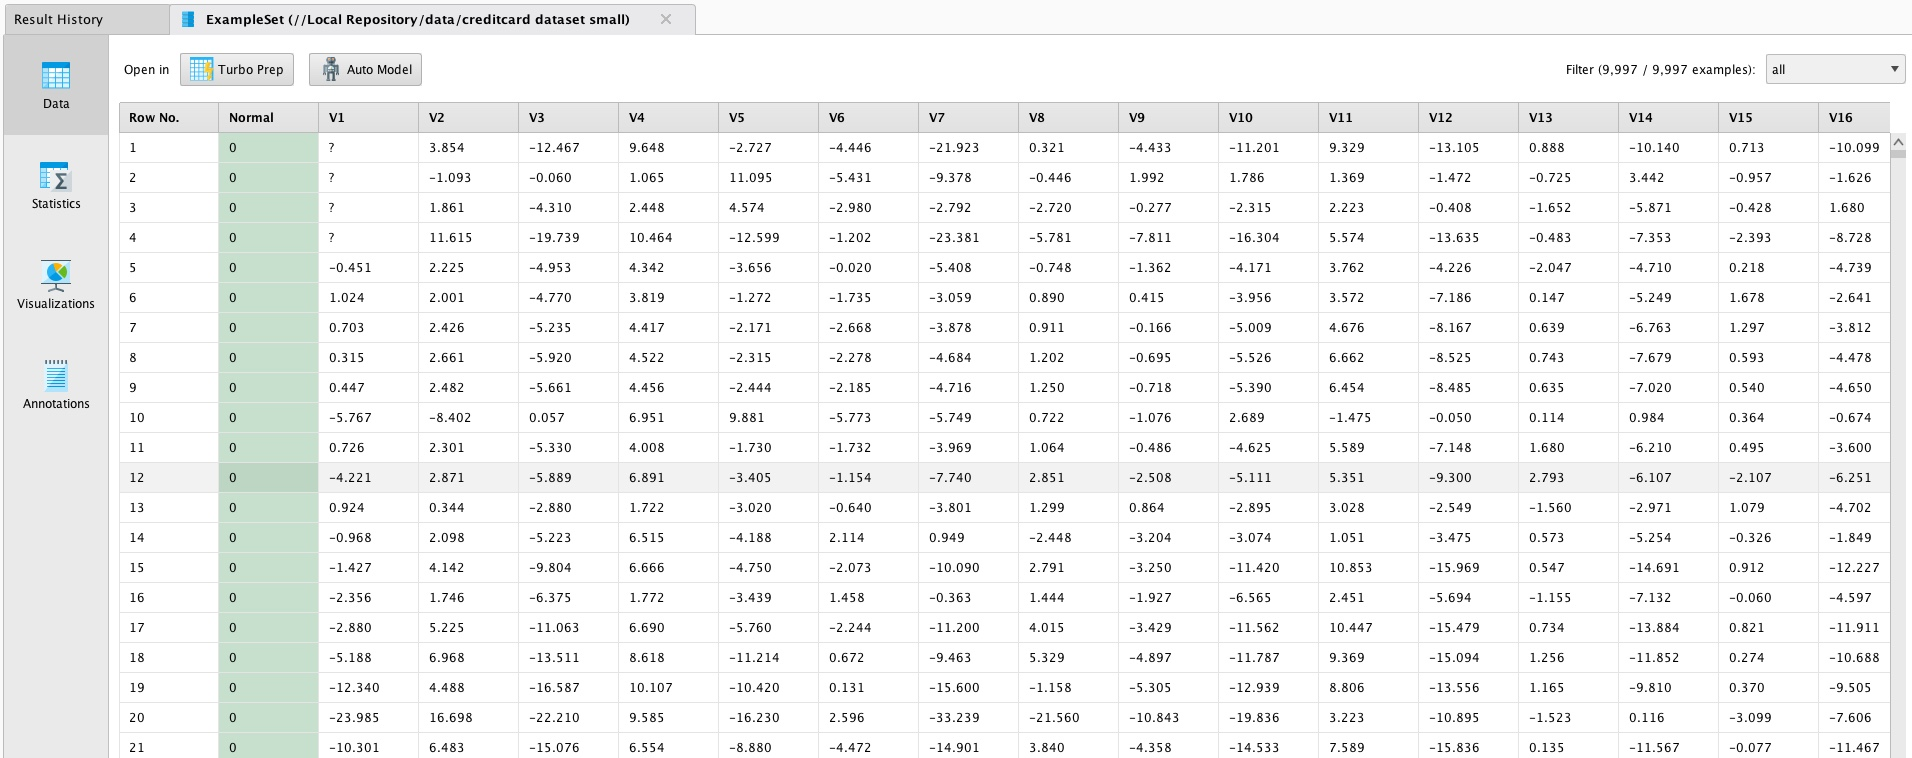

In [4]:
#train.rename(columns={'Normal':'Class'}, inplace=True)
train['Class'] = 1 - train['Normal']

#dropping Normal
train.drop(columns=['Normal'], inplace = True)

In [5]:
train.head(20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V28.1,Amount,Class
0,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.775036,1218.89,1
1,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,...,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.424849,0.92,1
2,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,0.319402,1.00,1
3,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,...,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.462680,1.63,1
4,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,0.001321,113.92,1
5,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,-3.955812,...,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,0.020206,1.00,1
6,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,0.129305,1.00,1
7,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,-5.526278,...,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,0.185030,1.00,1
8,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,-5.390330,...,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,0.175414,1.00,1
9,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,2.688670,...,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.583799,0.00,1


###  b) Removing synonymous and noisy attributes (4 marks)


This is executed as a two-step process. First we need see if there are **duplicate or strongly correlated attributes**, as these will be removed. After this step the distribution of attribute values is checked for **noise and outliers**. This, however, will need to be done with caution, as the goal of the whole exercise is to find exceptions (fraudulent transactions) and hence outliers can be of significant meaning rather than noise. 

#### Removing duplicate and strongly correlated attributes
The below RapidMiner process (and its outcome) and the Python correlation matrix both shows that there is one duplicate column (**v28-1**) that is the same as column v28. 

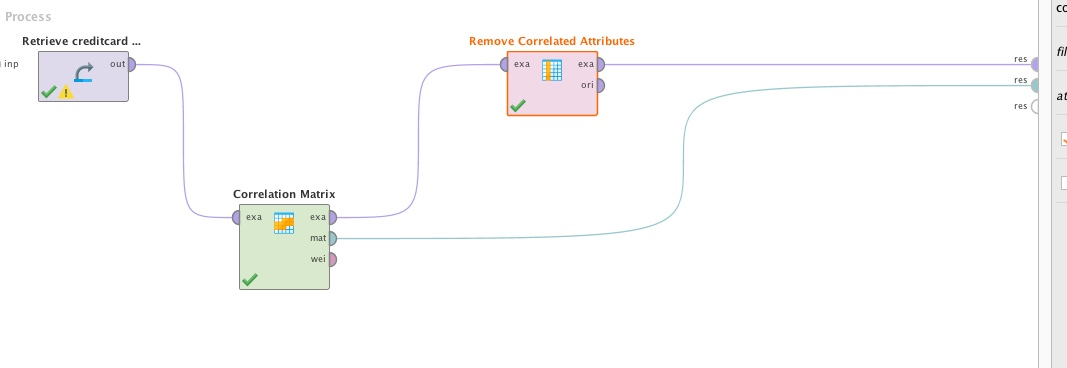


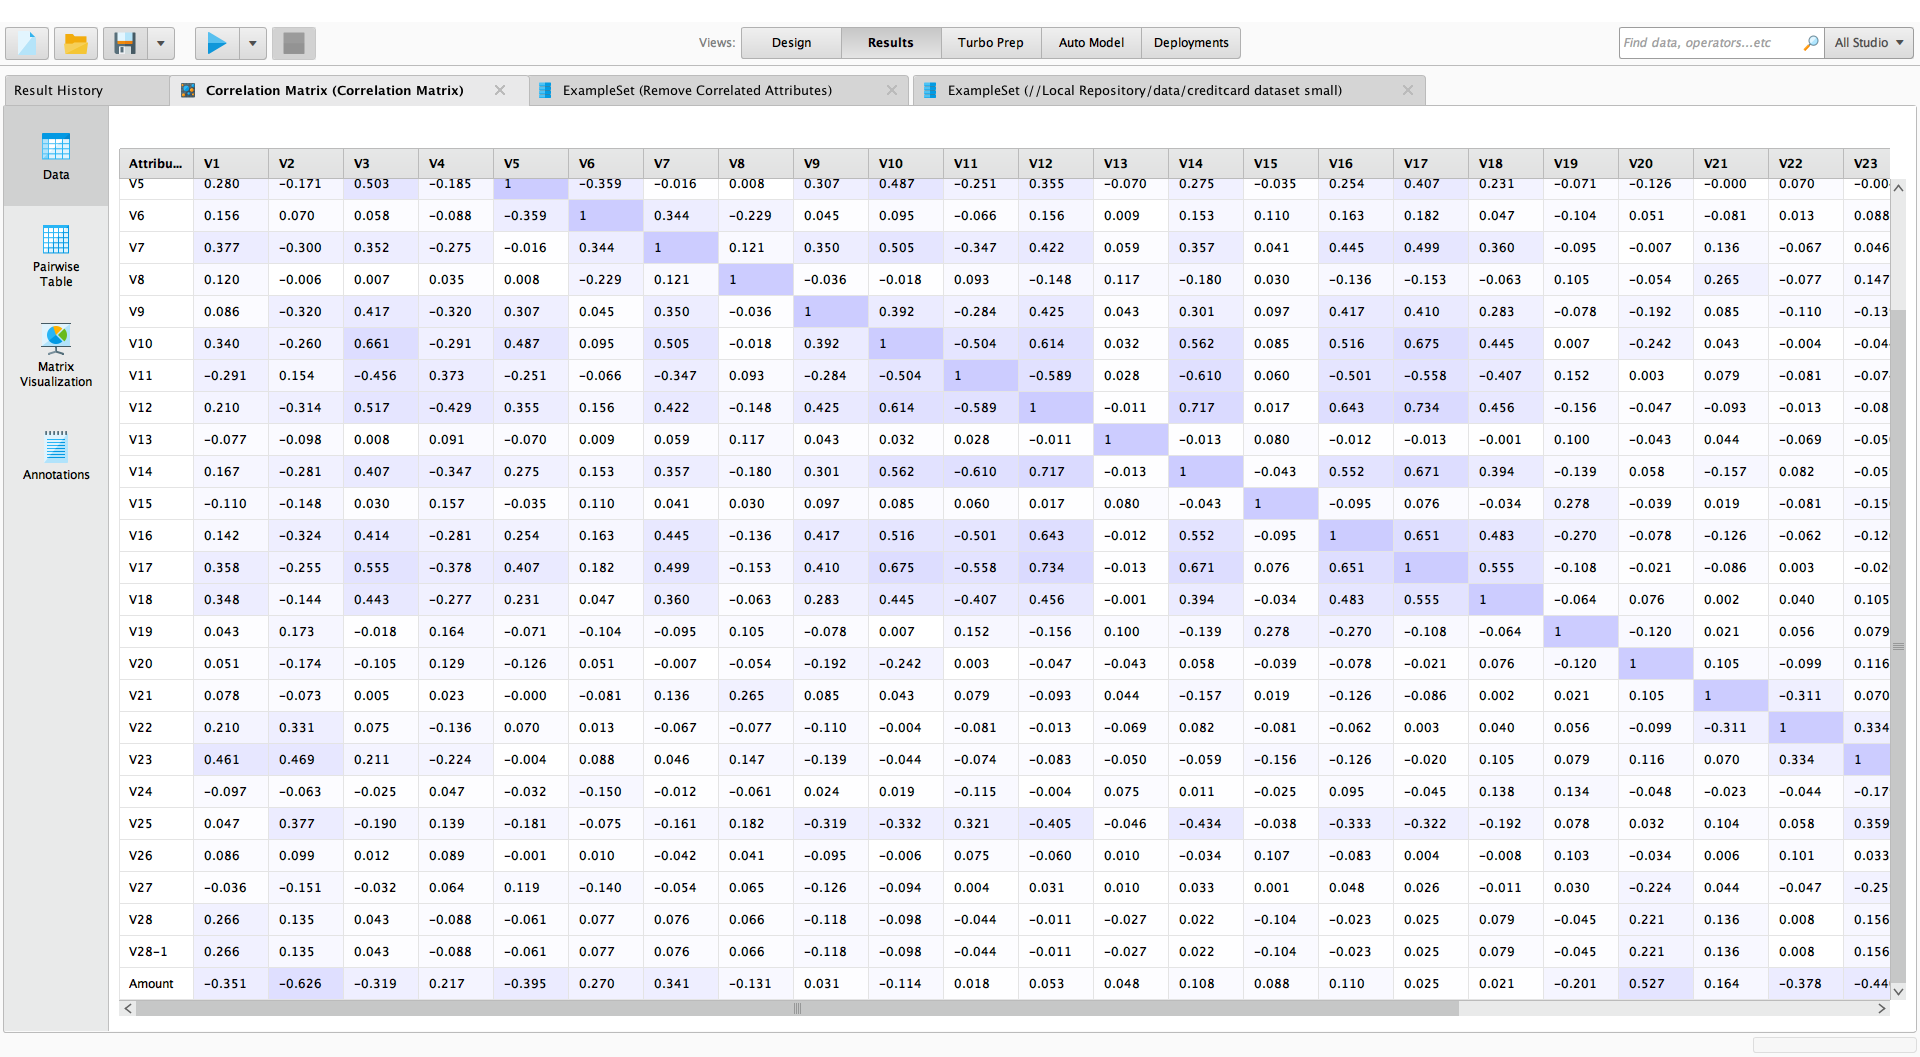

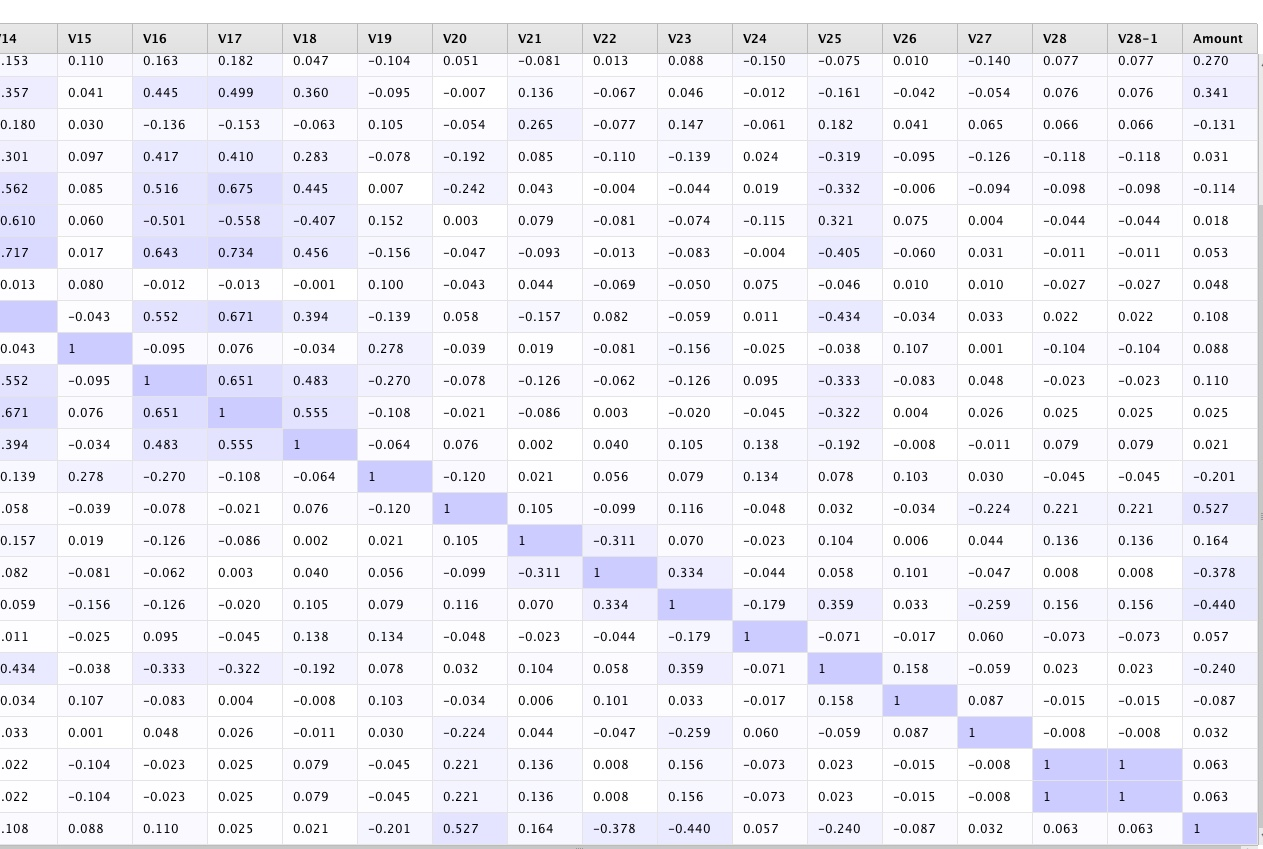

For generating the correlation matrix the columns **Amount and Class** are exluded

In [6]:
# calculating and drawing the correlation matrix in python
# not interested in Class and Amount correlation for now
corr_matrix = train.drop(columns=['Class','Amount'])
corr_matrix = corr_matrix.corr()
corr_matrix.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V28.1
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.176949,0.008127,0.179732,-0.072042,0.092112,0.055567,0.144556,0.045096,0.083676,0.154735,...,0.014245,0.050001,0.040950,0.083272,0.015358,-0.008821,0.055530,0.012850,0.090325,0.090325
std,0.282696,0.300068,0.335096,0.299667,0.283199,0.229524,0.294030,0.216448,0.303444,0.365590,...,0.223141,0.213205,0.225680,0.258013,0.203683,0.292965,0.192166,0.209795,0.269055,0.269055
min,-0.473824,-0.323623,-0.456468,-0.473824,-0.359072,-0.359072,-0.346804,-0.228666,-0.320162,-0.503799,...,-0.242391,-0.311284,-0.311284,-0.259397,-0.178819,-0.433962,-0.095449,-0.259397,-0.117810,-0.117810
25%,0.046693,-0.173855,0.004968,-0.281230,-0.070235,-0.074740,-0.041906,-0.060781,-0.117810,-0.093695,...,-0.098528,-0.023371,-0.069374,-0.074133,-0.063387,-0.190414,-0.014814,-0.054267,-0.044185,-0.044185
50%,0.155563,-0.072732,0.043493,-0.088235,-0.000721,0.051373,0.075704,0.030040,0.043054,0.032498,...,-0.034031,0.022844,0.002861,0.046489,-0.024694,-0.038318,0.009895,0.001042,0.022058,0.022058
75%,0.339561,0.134938,0.417373,0.089206,0.274779,0.109708,0.356934,0.104888,0.306933,0.487307,...,0.058414,0.084561,0.069970,0.156438,0.023611,0.104113,0.086979,0.044329,0.078521,0.078521
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap for credit card data')

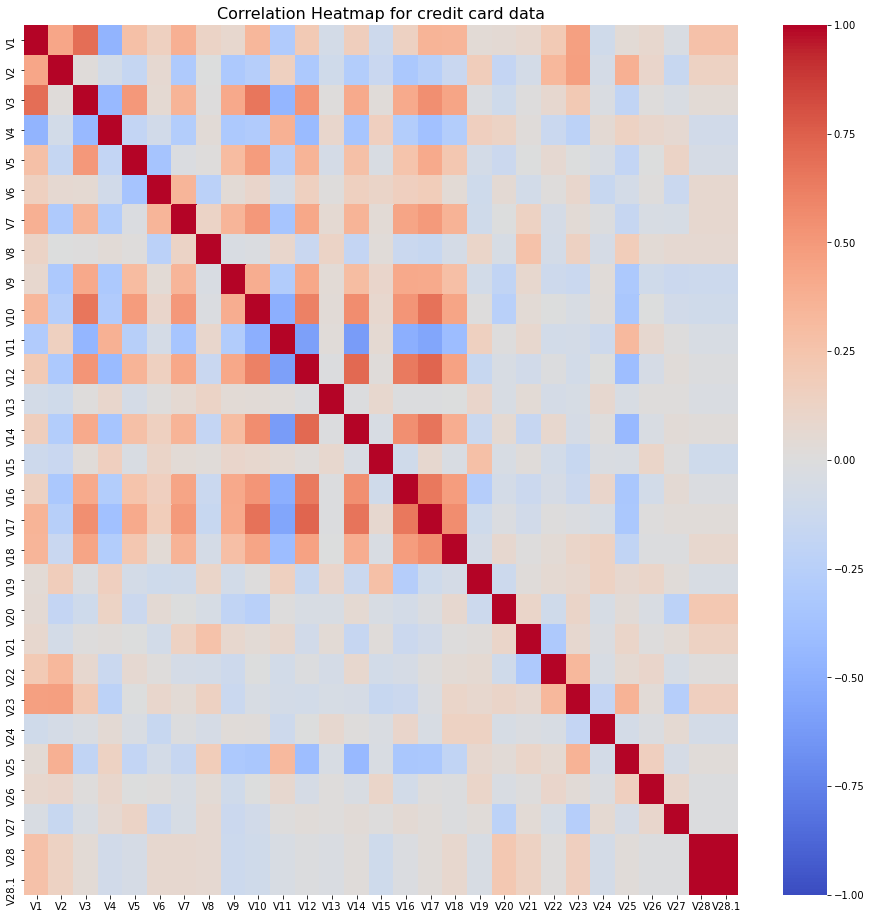

In [7]:
# configuring seaborn to provide a visible and readable representation of the correlation matrix
plt.figure(figsize=(16,16))
heatmap = sns.heatmap(corr_matrix,vmin=-1.0, vmax = 1.0,  cmap='coolwarm')
heatmap.set_title('Correlation Heatmap for credit card data', fontdict={'fontsize':16})

As the result of the correlation analysis **Column V28.1 is removed**

In [8]:
train.drop(columns=['V28.1'], inplace = True)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,NaN,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
1,NaN,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,...,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1
2,NaN,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1
3,NaN,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1
4,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1


#### Analysing noise and outliers
the below histograms display the distribution of attribute values. Arranging them would result in a too small display and hardly visible noise 

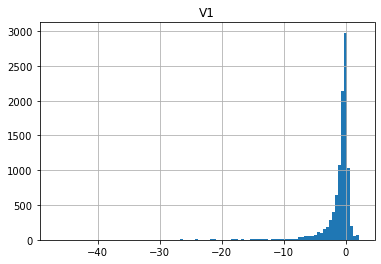

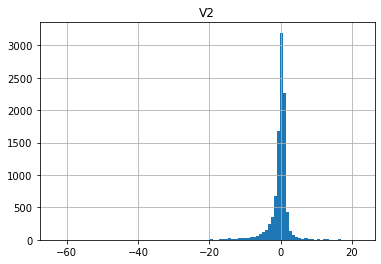

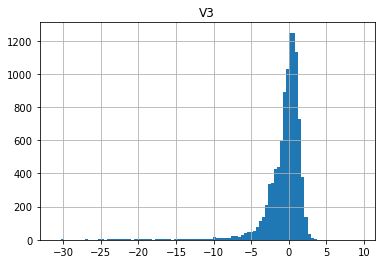

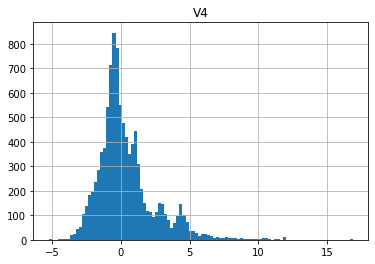

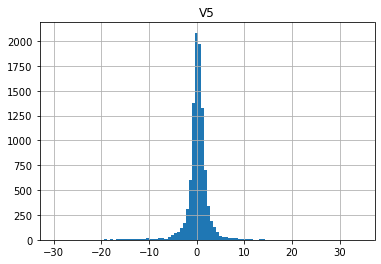

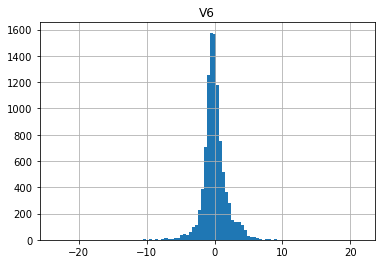

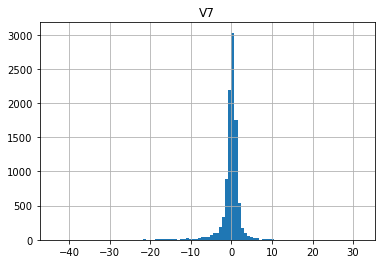

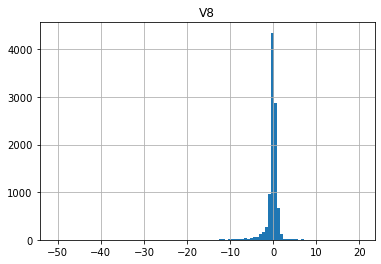

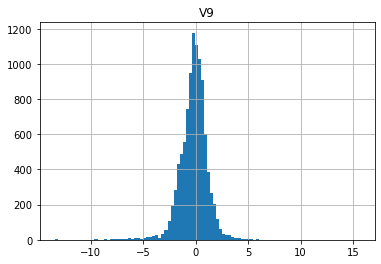

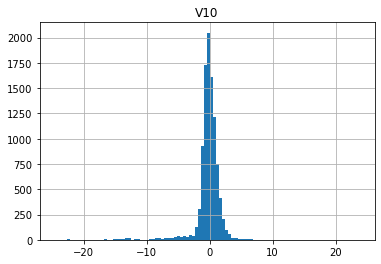

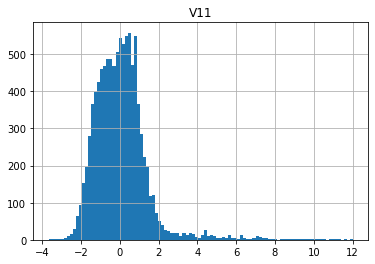

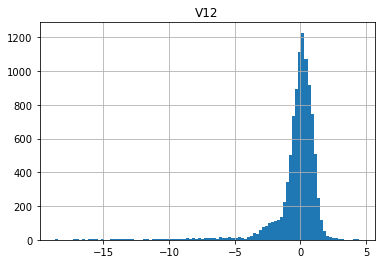

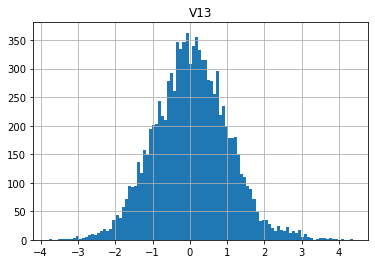

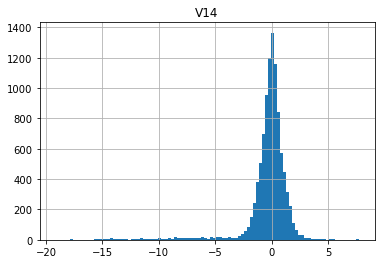

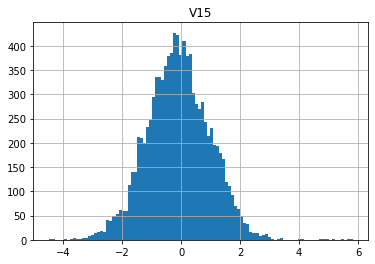

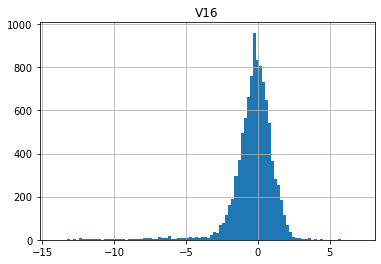

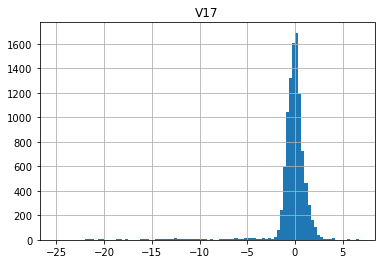

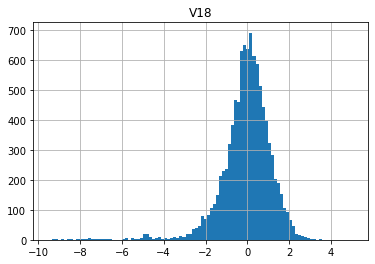

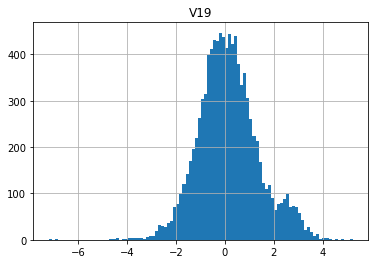

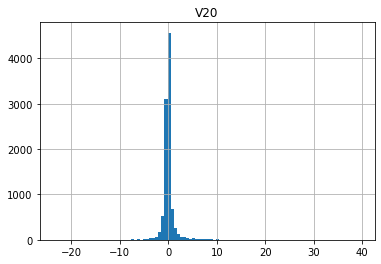

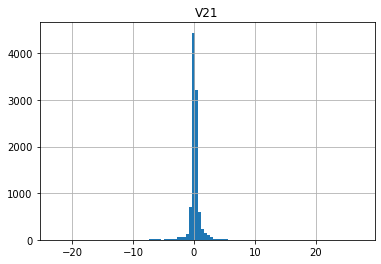

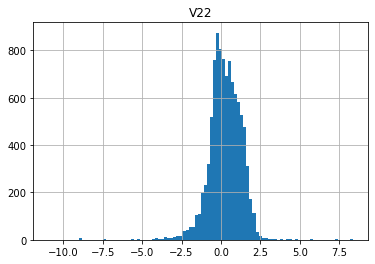

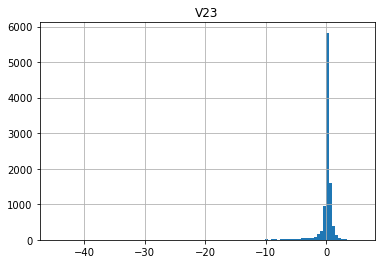

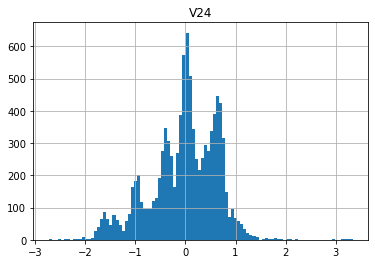

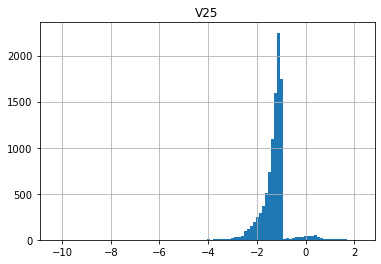

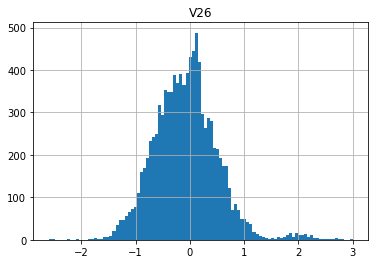

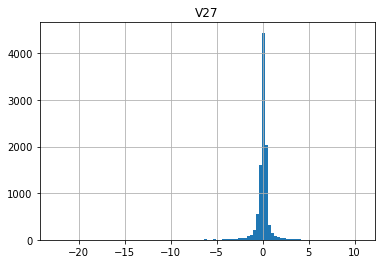

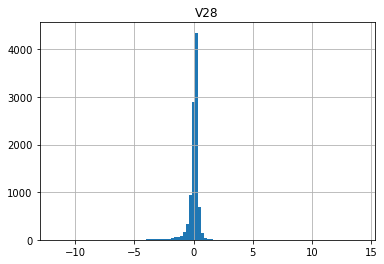

In [9]:
distr_df = train.drop(columns=['Amount', 'Class'])

# ugly hack to get around the warning, using decent subplot would be better
plt.rcParams.update({'figure.max_open_warning': 0}) 
fig = plt.gcf()

for i in range(28):    
    ax = distr_df.iloc[:, [i]].hist(bins=100)
plt.close(fig)



From the above it can be seen that **V19, V22, V24 and V26** have some minor and not so minor deviation from a near-perfect distribution, for all other attributes the potiential noise is too small. 

Taking a closer look it shows that:

#### V19
There are quite some values (cca. 350+) deteroating from the expected normal distribution-like shape, as shown below. Similar to V26, however, it is not yet possible to adequately assess if these are noise or part of valid data that may actually cause fraudulent transactions. Without further domain knowledge it is not yet possible to assess. Once a proper model is achieved, it may make sense to remove these outlier and retrain the model to see if the performance is increased or not.

In [10]:
# approximating how much more values there are over 2.5 by subtracting all <2.5 from all >2.5 items 
# (assuming symmetrical distribution for simplicity)

v19_noise = distr_df[distr_df['V19']>2.5]['V19']
v19_negative_pair = distr_df[distr_df['V19']< -2.5]['V19']
v19_approx_noise = v19_noise.count() - v19_negative_pair.count()
print(f'approximate deviation: {v19_approx_noise},  ratio of: {round(v19_approx_noise*100 / train.shape[0],2)} % in the dataset')


approximate deviation: 376,  ratio of: 3.76 % in the dataset


#### V4, V11, V13, V22
There are smaller bumps in the curves, but they are not significant (cca 50-100 items) and can easily be part of data collection, PCA or data ingestion / rounding etc. These values are not removed from the data set

#### V26

157 items (see below) is not insignificant - especially given the imbalance of the task as shown in a later section - however, as the model is expected to find exceptions this may very well be a reason to fraudulent transactions rather than noise. Once a good model is built up it may make sense to reiterate this topic and assess how removing these outliers would affect the overal model performance

In [11]:
v26_noise = distr_df[distr_df['V26']>1.5]['V26']
print(f'ratio of V26 noise: {round(v26_noise.count()*100 / train.shape[0],2)} % in the dataset')
v26_noise.sort_values()

ratio of V26 noise: 1.57 % in the dataset


2813    1.507175
1422    1.514310
3003    1.520410
1843    1.539517
1808    1.553983
          ...   
5302    2.706634
32      2.745261
3164    2.769145
6382    2.813120
3982    3.004455
Name: V26, Length: 157, dtype: float64

### Summary of removing synonymous and noisy attributes 

One column, V28.1 was found to be identical (1.0 correlation) to V28 and hence was removed from the datase
Two attributes - V19 and V26 - have quite a few approximated outliers but as of now are not removed. In subsequent analysis it would make sense to remove them and reassess the model for changed performance

###  c) Dealing with missing values (4 marks)


From the above describe outcome it can be seen that column **V1** has **4** missing values, but to validate it below is the count of nulls for each column:

In [12]:
train.isnull().sum()

V1        4
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The missing values will be filled with a mean value **before** splitting the train and test sets as seen below. (Reasoning / side note: to be correct, this should be done only after train-test split, but given it's a very low number (4 out of 9997, 0.04%) filling these with the average value before splitting the train-test set will not introduce a significant data leakage, however, it makes developing and running the model much much easier)

In [13]:
mean_v1 = train['V1'].mean()
print(f'Filling V1 column with {mean_v1} value')
train['V1'] = train['V1'].fillna(mean_v1)
train.head(10)

Filling V1 column with -1.2428937706094296 value


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.242894,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
1,-1.242894,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,...,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1
2,-1.242894,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1
3,-1.242894,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1
4,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1
5,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,-3.955812,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.00,1
6,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1.00,1
7,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,-5.526278,...,0.743314,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,1.00,1
8,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,-5.390330,...,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1.00,1
9,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,2.688670,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1


###  d) Rescaling if necessary (4 marks)

As shown below the column **Amount** differs very much from columns **V1, V2, ... ,V28**. Amount values are between 0 and 19656 with a mean of 207, while all other columns' means are around 0 and the min / max values a much smaller. So while it seems that the V columns have gone through PCA, the Amount column in this form may have an adverse effect on the model. 

In [14]:
print(train['Amount'].describe())

count     9997.000000
mean       207.815347
std        679.652086
min          0.000000
25%          8.920000
50%         34.950000
75%        125.900000
max      19656.530000
Name: Amount, dtype: float64


#### Normalising Amount variable
Creating a new NormAmount column, checking its distribution and finally overwriting the original values
scroll to the right to see the new NormAmount column

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
train['NormAmount'] = scaler.fit_transform(train['Amount'].values.reshape(-1,1))
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,NormAmount
0,-1.242894,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1,-0.875981
1,-1.242894,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,...,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.92,1,-0.999906
2,-1.242894,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1,-0.999898
3,-1.242894,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,...,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1,-0.999834
4,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,113.92,1,-0.988409


In [16]:
print(train['NormAmount'].describe())

count    9997.000000
mean       -0.978855
std         0.069153
min        -1.000000
25%        -0.999092
50%        -0.996444
75%        -0.987190
max         1.000000
Name: NormAmount, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

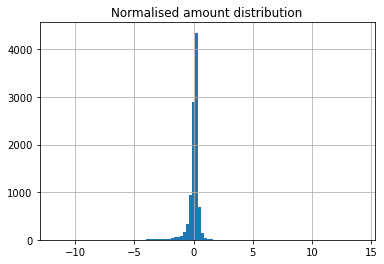

In [17]:
# checking amount distribution
ax = distr_df.iloc[:, [-1][0]].hist(bins=100)
ax.title.set_text('Normalised amount distribution')
plt.show

In [18]:
train['Amount'] = train['NormAmount']
train.drop(columns=['NormAmount'], inplace = True)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.242894,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,-0.875981,1
1,-1.242894,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,1.785922,...,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,-0.999906,1
2,-1.242894,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,-0.999898,1
3,-1.242894,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,-16.303538,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,-0.999834,1
4,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,-0.988409,1


## Class imbalance analysis
Given the nature of the task so that we're looking for anomalies, it is expected that the fraudulent transactions will be significantly less than the normal ones. The below chart shows the distribution of the two types. 

As assumed the ratio is really skewed towards normal transactions, so when splitting the data later for training and testing care has to be taken to maintain this relation. Otherwise it could happen that i.e. there is no test data for fraudulent transactions or there are not enough anomalies to train the model

Therefore when train-test splitting happens **stratification** has to be applied for all cases. As one the main recommendations is to use **oversampling** when data is imbalanced, both models will also be trained on oversampled and non-oversampled data as well. This is done because initial exploratory models show little difference between the models trained only on stratified data and oversampled and stratified one. Comparison between the test results on oversampled and non-oversampled data hence can be done

normal transactions: 9505
fraudulent transactions: 492


<BarContainer object of 2 artists>

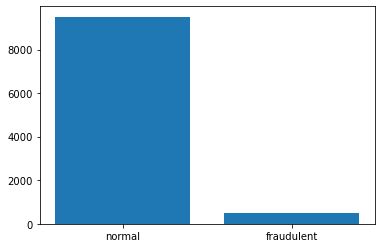

In [19]:
normal = train[train['Class']==0].shape[0]
fraudulent = train[train['Class']==1].shape[0]
print(f'normal transactions: {normal}')
print(f'fraudulent transactions: {fraudulent}')
plt.bar(['normal','fraudulent'], [normal, fraudulent])

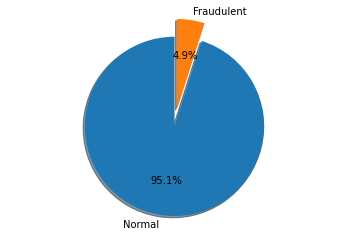

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Normal', 'Fraudulent'
norm_ratio = normal / (normal + fraudulent)
fr_ratio = fraudulent / (normal + fraudulent)
sizes = [norm_ratio, fr_ratio]
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Splitting the data

To be able to use the train - test split for both decision tree and knn the split operation happens here. 
Given the imbalance of the problem splitting is done using **stratification**

- for splitting the test-train dataset, 30% of the data is used for testing. While this could be set lower or higher, it's a reasonable value to start with
- for splitting the test-train dataset stratication is set. The problem is highly imbalanced and it makes sense to enforce the same fraudulent transaction ratio

After the initial split separate train sets (X_train_over and Y_train_over) will be generated with 40% fraudulent test data with random oversampling

In [21]:
#X = train.drop(columns=['Class'])
X = train.copy()
Y = train['Class']
#using random 42 for now and forcing stratification on label (y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,  random_state=42, stratify = Y) 

**Random oversampling**

Rather than having SMOTE or some other built-in algorithm running oversampling on the train data the below code implements a simplistic random oversampling. The positive classes will be selected with replacement and appended to the balanced train set to reach a designated ratio

In [22]:
'''
    Simplistic random oversampling. 
    
    Input:
        xtrain: imbalanced train data / attributes 
        ytrain: imbalanced train data / class
        searchColumn: column name of the class in xtrain! (requires that the class column is still in X)
        searchValue: value of the minority class
        positive_ratio: the required positive percentage of the returned training data.

    Returns:
        x_balanced: dataframe of the same format as xtrain but with added random minority records
        y_balanced: dataframe of the same format as ytrain but with added random minority records
'''
def randomOversampling(xtrain, ytrain, searchColumn, searchValue, ratio):    
    # warning, no error checking on ratio's meaningful values, i.e. if it's smaller than the current
    # it is assumed that x and y inputs have the same order, ie., the 7th x training corresponds to the 7th y training
    
    assert ratio<=1.0, 'Ratio must be smaller or equal to 1.0'
    
    searchValue = int(searchValue)
    
    current_positives = xtrain[xtrain[str(searchColumn)] == searchValue]
    
    current_positives_count = current_positives.shape[0]
    print(f'having {current_positives_count} positive values in the X train table')
    
    current_ratio = current_positives.shape[0] / xtrain.shape[0]
    print(f'current ratio: {round(current_ratio*100,2)}%')
    
    print(f'input train data shape: {xtrain.shape}')
    
    #to_be_added = int(xtrain.shape[0] * ratio) - current_positives_count
    #print(f'to be added: {to_be_added} positive items')
    
    # the number of items to be added is:
    # from ratio = (new total positives) / (new total)
    # new total positives = current positives + newly added positives
    # new total = current number of items + newly added positives
    # rearranging -> newly added positives = (ratio * current number of items - current positives) / (1 - ratio)
    
    to_be_added = int((ratio * xtrain.shape[0] - current_positives_count) / (1 - ratio))
    print(f'to be added: {to_be_added} positive items')
    
    x_list = []
    y_list = []
    
    for i in range(to_be_added):
        #random selecting records from current positive and inserting them to the new frame        
        idx = random.randrange(current_positives_count)       

        to_copy = current_positives.iloc[idx,].copy(deep=True)        
        to_copy['Class'] = searchValue #for debudding purposes
        #print(to_copy)
        x_list.append(to_copy)
        y_list.append(1)
    
    #print(x_list)
    x_balanced = xtrain.append(x_list)
    y_balanced = ytrain.append(pd.Series(y_list))
    
    
    new_positives = x_balanced[x_balanced['Class'] == int(searchValue)]
    print(f'new positives count: {new_positives.shape[0]}')
    print(f'new positives ratio: {round(new_positives.shape[0]*100 / x_balanced.shape[0], 2)}%')
    
    return x_balanced, y_balanced 
    
    

In [23]:
X_train_skewed = X_train.copy(deep = True)
Y_train_skewed = Y_train.copy(deep = True)

display(X_train_skewed.describe())

print(f'pre oversampling positives: X: {X_train_skewed[X_train_skewed["Class"] == 1].shape[0]} and y:{Y_train_skewed[Y_train_skewed == 1].shape[0]} ')
print(f'pre oversampling positives test: X: {X_test[X_test["Class"] == 1].shape[0]} and y:{Y_test[Y_test == 1].shape[0]} ')

X_train_over, Y_train_over = randomOversampling(X_train_skewed, Y_train_skewed,'Class', 1, 0.4)
      
print(f'post oversampling positives: X: {X_train_over[X_train_over["Class"] == 1].shape[0]} and y:{Y_train_over[Y_train_over == 1].shape[0]} ')
print(f'original shapes, x: {X_train_skewed.shape}, y: {Y_train_skewed.shape}')
print(f'new shapes, x: {X_train_over.shape}, y: {Y_train_over.shape}')

display(X_train)

display(X_train.describe())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,...,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,-1.242341,-0.349840,-0.603202,0.391490,0.167842,0.036557,-0.174803,-0.231382,-0.216548,-0.213707,...,0.117086,0.262936,-0.093323,-0.032969,-1.295685,-0.083316,0.040423,0.044087,-0.979269,0.049164
std,3.033746,3.431786,2.836345,2.142723,2.576143,1.824532,2.941295,2.596261,1.357601,2.040902,...,1.478115,1.045383,1.967404,0.666871,0.567172,0.575037,0.837919,0.581685,0.065371,0.216226
min,-46.855047,-60.464618,-31.103685,-5.266509,-29.730600,-23.496714,-43.557242,-50.420090,-13.434066,-24.588262,...,-22.889347,-9.499423,-44.807735,-2.541474,-10.295397,-2.604551,-7.689004,-7.756345,-1.000000,0.000000
25%,-1.264125,-0.687971,-1.182068,-0.878189,-0.543744,-0.819091,-0.527161,-0.333915,-0.848142,-0.685602,...,-0.143850,-0.329028,0.015087,-0.404065,-1.479242,-0.470671,-0.107363,-0.034877,-0.999087,0.000000
50%,-0.427399,0.267842,0.038607,-0.134036,0.250187,-0.107243,0.183358,0.024696,-0.120478,-0.097810,...,0.086474,0.261240,0.199985,0.027748,-1.209384,-0.086848,0.121338,0.140878,-0.996541,0.000000
75%,-0.022763,0.848720,0.848532,1.132660,1.087468,0.761283,0.811723,0.423245,0.544772,0.660266,...,0.386510,0.955431,0.404794,0.498059,-1.059088,0.253965,0.276639,0.266724,-0.987616,0.000000
max,2.030159,22.057729,4.226108,16.875344,34.099309,21.307738,31.527244,20.007208,7.496577,7.536397,...,27.202839,8.361985,5.466230,3.340880,2.208209,2.745261,10.135597,13.999688,0.924043,1.000000


pre oversampling positives: X: 344 and y:344 
pre oversampling positives test: X: 148 and y:148 
having 344 positive values in the X train table
current ratio: 4.92%
input train data shape: (6997, 30)
to be added: 4091 positive items
new positives count: 4435
new positives ratio: 40.0%
post oversampling positives: X: 4435 and y:4435 
original shapes, x: (6997, 30), y: (6997,)
new shapes, x: (11088, 30), y: (11088,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2019,-0.111752,0.335990,0.136514,-1.088081,1.054696,-0.232655,0.633316,0.075943,-0.359340,-0.401490,...,-0.241856,-0.946299,0.476332,0.135410,-1.691868,-0.213280,0.174505,0.264382,-0.996875,0
4473,0.322883,-0.640655,0.893433,-1.726277,-0.573387,0.791652,-0.919219,0.212453,-2.386342,1.525929,...,0.162924,0.950712,0.067952,-1.132209,-1.288561,-0.113232,0.327054,0.236501,-0.997456,0
2846,-1.725806,-0.955629,-1.436157,3.377166,4.132867,-0.009972,0.656283,-0.080280,-0.808262,1.108837,...,0.395831,1.728470,-0.148830,-1.303438,-1.497564,0.081546,0.540990,0.177735,-0.979963,0
5048,0.075309,-0.077981,1.599957,0.245747,-0.572621,0.639110,0.066492,0.010963,-1.132120,0.877119,...,0.020157,0.860300,0.190999,0.022024,-1.239968,-0.381905,0.169416,0.030773,-0.993285,0
5789,-0.651642,1.295989,-1.594926,1.184993,-1.838478,0.303444,2.657128,-0.904514,0.336146,0.446201,...,0.151267,1.312018,-0.072107,-0.041089,-1.183866,0.101400,0.027849,0.287925,-0.955948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,-0.314334,0.025585,0.553811,-0.209164,1.263581,-1.361751,0.723522,-0.388165,0.002402,-0.206675,...,-0.164029,-0.418370,0.169513,-0.119894,-1.034004,0.118630,-0.025667,0.002929,-0.999909,0
9986,0.874138,-2.258595,-1.537584,0.305295,0.039254,1.983734,-0.073311,0.474960,0.869010,-0.267781,...,-0.035718,-1.118722,0.045105,-0.950752,-0.970777,0.171680,-0.105173,0.023311,-0.945632,0
3487,-0.425669,1.097553,-1.172961,-0.001548,-1.995164,1.202815,-2.823548,-7.969932,0.230359,-1.841008,...,-3.497098,2.205955,0.899762,0.000370,-1.397406,0.061699,0.366434,0.475197,-0.979854,0
541,-4.874923,-5.325587,-2.894926,3.201856,-2.938393,2.135570,-1.209154,-6.985066,0.253540,-1.222797,...,-2.416889,-1.360827,-17.026156,1.652298,-3.308049,-0.712390,2.399486,0.112441,-0.658129,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,...,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,-1.242341,-0.349840,-0.603202,0.391490,0.167842,0.036557,-0.174803,-0.231382,-0.216548,-0.213707,...,0.117086,0.262936,-0.093323,-0.032969,-1.295685,-0.083316,0.040423,0.044087,-0.979269,0.049164
std,3.033746,3.431786,2.836345,2.142723,2.576143,1.824532,2.941295,2.596261,1.357601,2.040902,...,1.478115,1.045383,1.967404,0.666871,0.567172,0.575037,0.837919,0.581685,0.065371,0.216226
min,-46.855047,-60.464618,-31.103685,-5.266509,-29.730600,-23.496714,-43.557242,-50.420090,-13.434066,-24.588262,...,-22.889347,-9.499423,-44.807735,-2.541474,-10.295397,-2.604551,-7.689004,-7.756345,-1.000000,0.000000
25%,-1.264125,-0.687971,-1.182068,-0.878189,-0.543744,-0.819091,-0.527161,-0.333915,-0.848142,-0.685602,...,-0.143850,-0.329028,0.015087,-0.404065,-1.479242,-0.470671,-0.107363,-0.034877,-0.999087,0.000000
50%,-0.427399,0.267842,0.038607,-0.134036,0.250187,-0.107243,0.183358,0.024696,-0.120478,-0.097810,...,0.086474,0.261240,0.199985,0.027748,-1.209384,-0.086848,0.121338,0.140878,-0.996541,0.000000
75%,-0.022763,0.848720,0.848532,1.132660,1.087468,0.761283,0.811723,0.423245,0.544772,0.660266,...,0.386510,0.955431,0.404794,0.498059,-1.059088,0.253965,0.276639,0.266724,-0.987616,0.000000
max,2.030159,22.057729,4.226108,16.875344,34.099309,21.307738,31.527244,20.007208,7.496577,7.536397,...,27.202839,8.361985,5.466230,3.340880,2.208209,2.745261,10.135597,13.999688,0.924043,1.000000


In [24]:
# false positive on chaining warning
pd.options.mode.chained_assignment = None  # default='warn'

X.drop(columns=['Class'], inplace = True)
X_train.drop(columns=['Class'], inplace = True)
X_test.drop(columns=['Class'], inplace = True)
# dropping Class from oversampled train data too
X_train_over.drop(columns=['Class'], inplace = True)

## 4. Decision Tree (part 1)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)

100-200 words


- Decision trees are quite simple models, reasonably quick to train and run them. Supervised learning and classification is very well suited for decision trees. 
- Decision trees are robusts, they have high tolerance for noise and missing values and they handle irrelevant attributes really well
- Given the goal of identifying fraudulent transactions my assumption is (and the model may prove or deny it) is that only a handful of features will really drive the class of a transaction, especially for fraudulent ones. If this is the case, a quite shallow decision tree may be adequate. Running such shallow models on unseen transactions can be very quick and can scale well for larger use cases as well. 
- This is also a good test to see how well a really simple model can perform on a real-like data and use case.

The steps of running decision tree is the following:
- split the train and test data - given the imbalance of the problem using **stratification** and optionally with **oversampling** (done above)
- prepare the decision tree with a set of initial hyper parameters set (i.e. depth, min leaf) on original train data
- prepare a decision tree with a set of initial hyper parameters set (i.e. depth, min leaf) on oversampled train data
- optimize hyper parameters (depth, criterion,i.e. gini or entropy, min split and min_leaf)
- test the models with the test data and measure the performance

The below diagrams show the main building blocks of the process in RapidMiner. Please note that there are two streams, one with simple test-train split and one with cross validation as discussed in the below sections (for brevity only the simple validations inner diagram is shown, the cross validation is essentially the same)

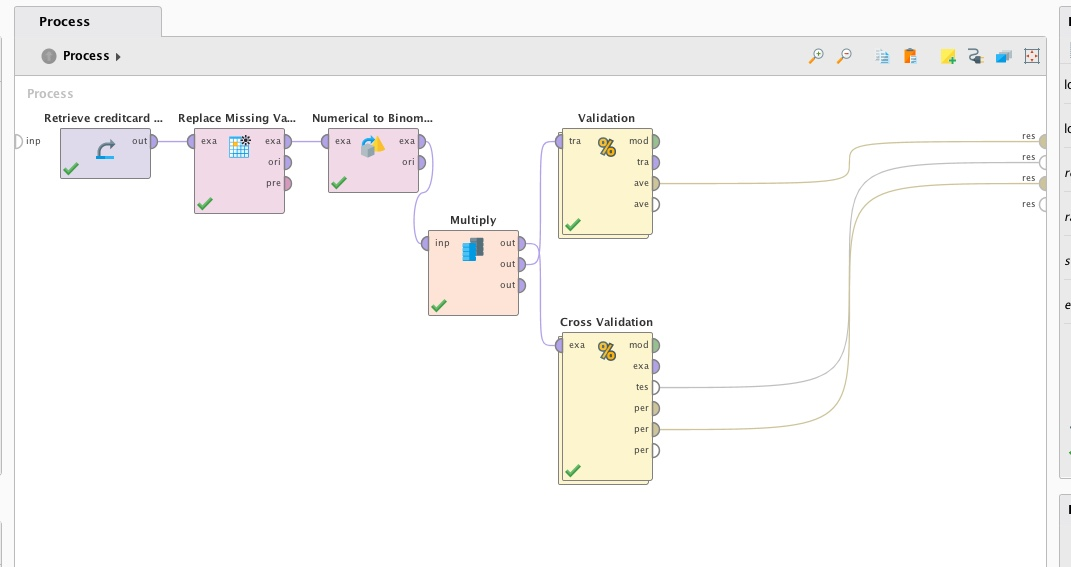

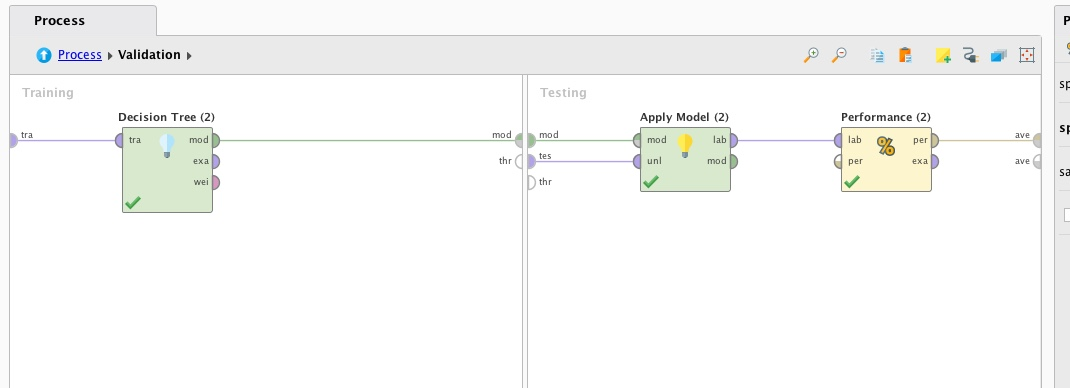

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (4 marks)


For training the two basic decision trees, the parameters are set as the following:
- initially the tree is set to optimize for gini index
- given there are 28 parameters, an initial tree depth of 2 is set to start with for the original train data
- a tree with depth of 3 will be trained for oversampled dataset. 
- Initial RapidMiner models (see - https://github.com/lacibacsi/data_science_assignment_3/blob/main/cr_dt_train_test_split.rmp) show that i.e. with a depth of 3 more than 98% accuracy can be reached 
- the minimum leaf node count is set to 2 initially, starting with a simple binary tree
- min_samples_leaf is left at the default value of 1
all other hyper parameters (max_fetures, class_weights) are left default

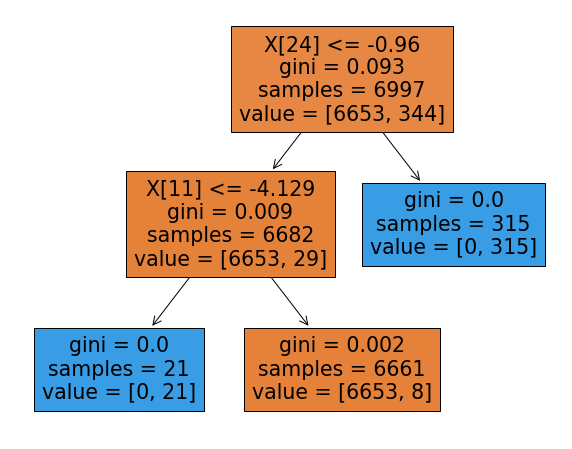

In [25]:
#using min_samples_split=2, which is the default, setting for completeness
DT   = DecisionTreeClassifier(max_depth=2, min_samples_split=2).fit(X_train, Y_train)

plt.figure(figsize=(10, 8))
plot_tree(DT, filled=True)
plt.show()

It can be seen from the above that even a very shallow tree (depth = 2) reaches 0 and very close to 0 gini indexes, which is very good. It also shows that **V25** is decisive factor or major contributor for the majority of fraudulent transactions

In [26]:
a = train[train['V25']>-0.963]
print(a['Class'].describe())

count    451.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Class, dtype: float64


**Creating a simple decision tree for oversampled train data**

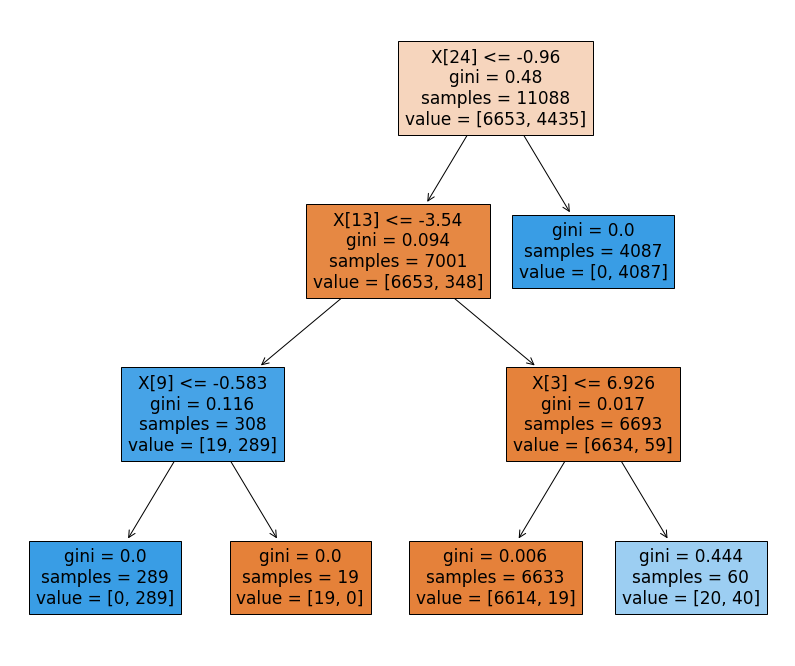

In [27]:
#using min_samples_split=2, which is the default, setting for completeness
DT_over   = DecisionTreeClassifier(max_depth=3, min_samples_split=2).fit(X_train_over, Y_train_over)

plt.figure(figsize=(14, 12))
plot_tree(DT_over, filled=True)
plt.show()

### c) Optimising hyper parameters (4 marks) 


The below section uses GridSearchCV with 10 folds to search and optimize the decision tree hyper parameters. The following parameters and values are used:
- criterion: {'gini','entropy'}
- max_depth: {1, ... ,10}
- min_samples_split: {2, ... ,10} - has to be greater than 1
- min_samples_leaf: {1,2, ... ,5}

**note**: it runs for cca 45 mins with a single job and 2.5 minutes on 4 cores

In [28]:
%%time
params = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,11),
    'min_samples_split':range(2,11),
    'min_samples_leaf':range(1,6)
}

# setting up gridsearch using a new DecisionTreeClassifier instance
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 10, verbose = 1, n_jobs = -1)
grid.fit(X_train, Y_train )

Fitting 10 folds for each of 900 candidates, totalling 9000 fits
CPU times: user 10.3 s, sys: 2.2 s, total: 12.5 s
Wall time: 3min 1s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 11)},
             verbose=1)

In [29]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

The decision tree with the optimised hyper parameters then is the following

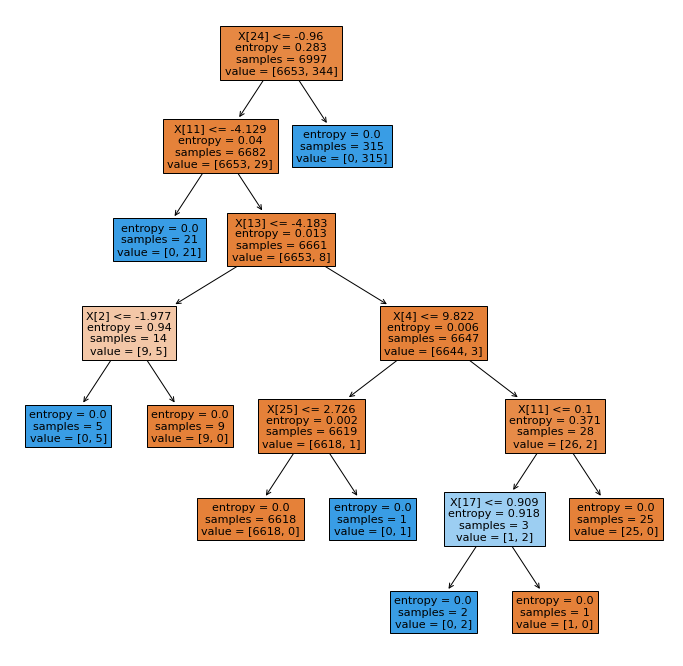

In [30]:
#using hyperparameters form gridsearchcv
DT2   = DecisionTreeClassifier(
    criterion = grid.best_params_['criterion'],
    max_depth = grid.best_params_['max_depth'], 
    min_samples_split = grid.best_params_['min_samples_split'],
    min_samples_leaf = grid.best_params_['min_samples_leaf']    
    ).fit(X_train, Y_train)

plt.figure(figsize=(12, 12))
plot_tree(DT2, filled=True)
plt.show()

Similarly for oversampled training dataset

In [31]:
%%time
params = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,11),
    'min_samples_split':range(2,11),
    'min_samples_leaf':range(1,6)
}

# setting up gridsearch using a new DecisionTreeClassifier instance
grid_over = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 10, verbose = 1, n_jobs = -1)
grid_over.fit(X_train_over, Y_train_over )

Fitting 10 folds for each of 900 candidates, totalling 9000 fits
CPU times: user 8.16 s, sys: 2.35 s, total: 10.5 s
Wall time: 2min 51s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 11)},
             verbose=1)

In [32]:
grid_over.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

The decision tree with the optimised hyper parameters on oversampled data then is the following

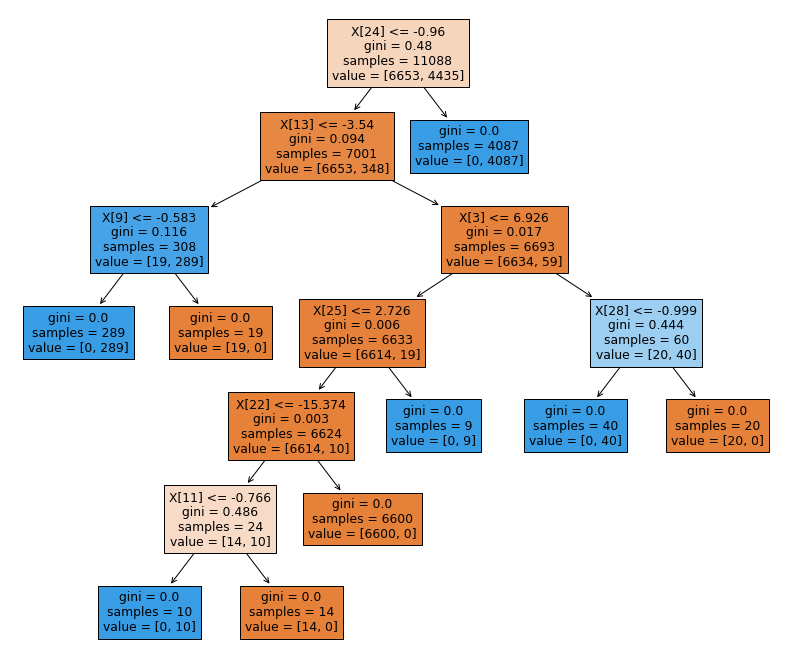

In [33]:
#using hyperparameters form gridsearchcv
DT2_over   = DecisionTreeClassifier(
    criterion = grid_over.best_params_['criterion'],
    max_depth = grid_over.best_params_['max_depth'], 
    min_samples_split = grid_over.best_params_['min_samples_split'],
    min_samples_leaf = grid_over.best_params_['min_samples_leaf']    
    ).fit(X_train_over, Y_train_over)

plt.figure(figsize=(14, 12))
plot_tree(DT2_over, filled=True)
plt.show()

### d) Performance metrics for training (4 marks)

The below sections show and compare the performance of the two decision trees on **training data**, the original and the one with cross validation and gridsearch run. Performance evaluation on testing data will be done in a later section

From the goals and understanding sections it is clear that the model needs to have at 90% detect+ and at least 70% predict+ metrics. The below section displays the following for both the simple and cross-validated models:
- the confusion matrices based on **training** data from above (stratified splitting of 70% for training)
- predict and detect
- accuracy and F1


**Accuracy of the model**

Given this is a highly imbalanced case, the accuracy is calculated as:

$$Accuracy = \frac{tp+tn}{tp+tn+fp+fn} $$

**F1 score**
F1 is calculated as:

$$ F1 = \frac{2TP}{2TP+FP+FN} $$

In [34]:
target_labels = ['normal','fraudulent']

#### d) 1. Confusion matrices and performance for the original model on training data (no CV, depth=2, min_sample_split=2)

tn: 6653, tp: 336, fn: 8, fp: 0


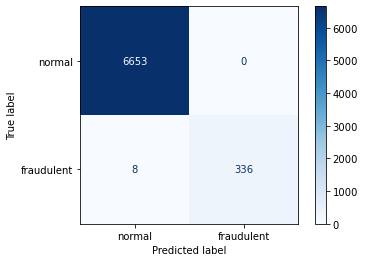

In [35]:
confusion   = plot_confusion_matrix(DT, X_train, Y_train, display_labels=target_labels, cmap=plt.cm.Blues)

# printing tp, tn, fp, fn for x-checking display
tn, fp, fn, tp = confusion.confusion_matrix.ravel()
print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')

*Predict and detect confusion matrices*

In [36]:
def printDetectPredict(classifier, x_train, y_train, displayText, detect=True, displayMatrix = True):
    
    if detect:
        typeText = 'detect'
        norm = 'true'
    else:
        typeText = 'predict'
        norm = 'pred'
        
    if displayMatrix:
        confusion   = plot_confusion_matrix(classifier, x_train, y_train, display_labels=target_labels, cmap=plt.cm.Blues, normalize=norm, values_format='.2f')
        matrix = confusion.confusion_matrix
    else:
        matrix = confusion_matrix(y_train, classifier.predict(x_train), normalize=norm)
        
    minus = matrix[0,0]
    plus = matrix[1,1]
    print(f'pr({typeText}+) for {displayText} = {round(plus, 3)} ')
    print(f'pr({typeText}-) for {displayText} = {round(minus, 3)} ')
    
    return plus, minus
        

pr(detect+) for DT depth = 2 = 0.977 
pr(detect-) for DT depth = 2 = 1.0 


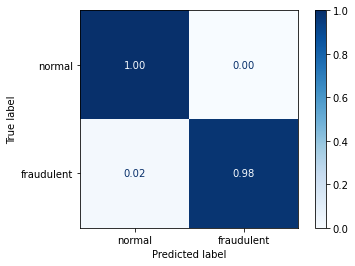

In [37]:
a,b = printDetectPredict(DT, X_train, Y_train, 'DT depth = 2')

pr(predict+) for DT depth = 2 = 1.0 
pr(predict-) for DT depth = 2 = 0.999 


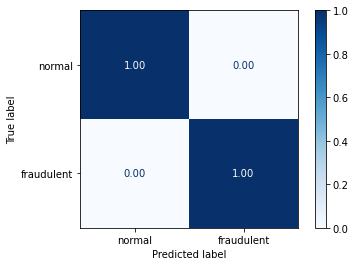

In [38]:
a, b = printDetectPredict(DT, X_train, Y_train, 'DT depth = 2', False)

*Precision and recall scores*

In [39]:
# prints precision and recall values for the input classifier and data
# only prints macro, the weighted is ommitted due to the high imbalance of the problem
def printRecallAndPrecision(classifier, x_data, y_labels):
    np.set_printoptions(precision=3)    
    print('Recall Scores')
    recall = recall_score(y_labels, classifier.predict(x_data),average='macro')
    print('%.3f'% recall )
    print(recall_score(y_labels,classifier.predict(x_data),average=None))
    print('---------------------------------------')

    print('Precision Scores')
    precision = precision_score(y_labels, classifier.predict(x_data),average='macro')
    print('%.3f'% precision)
    print(precision_score(y_labels, classifier.predict(x_data),average=None))
    print('---------------------------------------')

    return recall, precision

In [40]:
r, p = printRecallAndPrecision(DT, X_train, Y_train)

Recall Scores
0.988
[1.    0.977]
---------------------------------------
Precision Scores
0.999
[0.999 1.   ]
---------------------------------------


*Accuracy and F1 score*

In [41]:
def getAccuracyAndF1Score(classifier, x_data, y_data):
    accuracy = accuracy_score(y_data, classifier.predict(x_data))
    f1 = f1_score(y_data, classifier.predict(x_data))
    
    return accuracy, f1

def printAccuracyAndF1(classifier, x_data, y_data, classifier_text = 'DT'):
    accuracy, f1 = getAccuracyAndF1Score(classifier, x_data, y_data)
    print(f'Model accuracy for {classifier_text}: {round(accuracy,4)}')
    print(f'Model F1 score for {classifier_text}: {round(f1,4)}')

In [42]:
#accurcy and F1 for train data
printAccuracyAndF1(DT, X_train, Y_train, 'DT depth = 2')

Model accuracy for DT depth = 2: 0.9989
Model F1 score for DT depth = 2: 0.9882


It can be seen that the decision tree did a decent job of classifying true positives and true negatives even with a very shallow tree and the error seems to be quite low on the training data even for a simple, non-optimised case. However, this may be due to the imbalanced nature. To analyse if this is the case, below is the same training error measurements for the oversampled case

#### d) 2. Confusion matrices and performance for the original model on oversampled training data (no CV, depth=3)

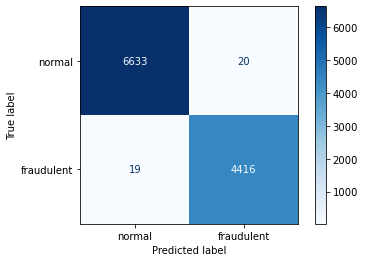

In [43]:
confusion   = plot_confusion_matrix(DT_over, X_train_over, Y_train_over, display_labels=target_labels, cmap=plt.cm.Blues)

*Predict and detect confusion matrices*

pr(detect+) for DT oversampled depth = 3 = 0.996 
pr(detect-) for DT oversampled depth = 3 = 0.997 


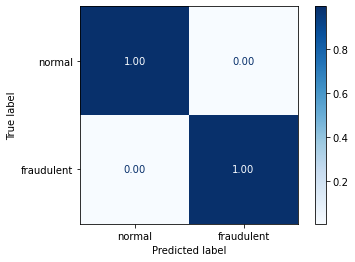

In [44]:
a, b = printDetectPredict(DT_over, X_train_over, Y_train_over, 'DT oversampled depth = 3')

pr(predict+) for DT oversampled depth = 3 = 0.995 
pr(predict-) for DT oversampled depth = 3 = 0.997 


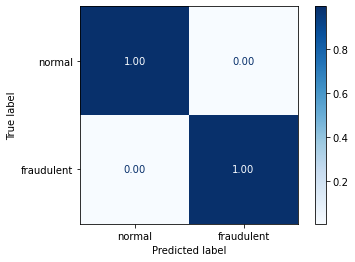

In [45]:
a, b = printDetectPredict(DT_over, X_train_over, Y_train_over, 'DT oversampled depth = 3', False)

*Precision and recall scores*

In [46]:
r, p = printRecallAndPrecision(DT_over, X_train_over, Y_train_over)

Recall Scores
0.996
[0.997 0.996]
---------------------------------------
Precision Scores
0.996
[0.997 0.995]
---------------------------------------


*Accuracy and F1 score*

In [47]:
#accurcy and F1 for oversampled train data
printAccuracyAndF1(DT_over, X_train_over, Y_train_over, 'DT oversampled depth = 3')

Model accuracy for DT oversampled depth = 3: 0.9965
Model F1 score for DT oversampled depth = 3: 0.9956


It can be seen that the shallow model of depth 3 performs very well on randomly oversampled data where the ratio of positive cases is 40%

#### d) 3. Confusion matrices and performance for the cross-validated model on training data (10 folds, depth=6)

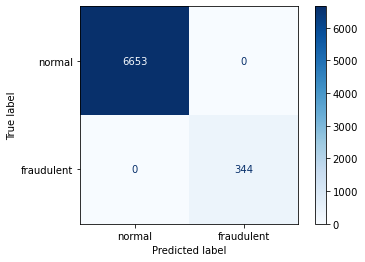

In [48]:
confusion   = plot_confusion_matrix(DT2, X_train, Y_train, display_labels=target_labels, cmap=plt.cm.Blues)

*Predict and detect confusion matrices*

pr(detect+) for DT non-oversampled, cv 10 fold = 1.0 
pr(detect-) for DT non-oversampled, cv 10 fold = 1.0 


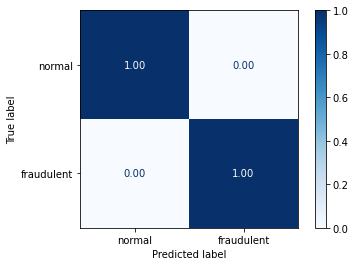

In [49]:
a, b = printDetectPredict(DT2, X_train, Y_train, 'DT non-oversampled, cv 10 fold')

pr(predict+) for DT non-oversampled, cv 10 fold = 1.0 
pr(predict-) for DT non-oversampled, cv 10 fold = 1.0 


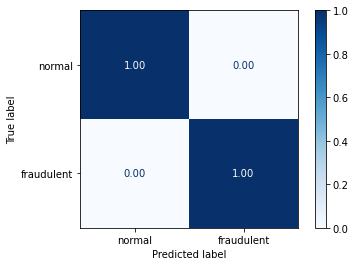

In [50]:
a, b = printDetectPredict(DT2, X_train, Y_train, 'DT non-oversampled, cv 10 fold', False)

*Precision and recall scores*

In [51]:
r, p = printRecallAndPrecision(DT2, X_train, Y_train)

Recall Scores
1.000
[1. 1.]
---------------------------------------
Precision Scores
1.000
[1. 1.]
---------------------------------------


*Accuracy and F1 score*

In [52]:
printAccuracyAndF1(DT2, X_train, Y_train, 'DT non-oversampled, cv 10 fold')

Model accuracy for DT non-oversampled, cv 10 fold: 1.0
Model F1 score for DT non-oversampled, cv 10 fold: 1.0


The cross-validated model does improve the original non-oversampled, but not to a huge extent (F1 score 0.995 vs 0.988).

#### d) 4. Confusion matrices and performance for the cross-validated model on oversampled training data (10 folds, depth=6)

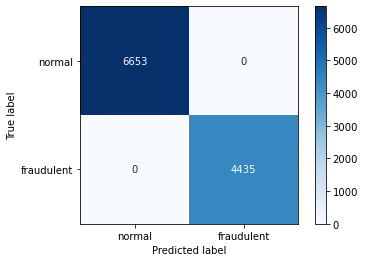

In [53]:
confusion   = plot_confusion_matrix(DT2_over, X_train_over, Y_train_over, display_labels=target_labels, cmap=plt.cm.Blues)

*Predict and detect confusion matrices*

pr(detect+) for DT oversampled, cv 10 fold = 1.0 
pr(detect-) for DT oversampled, cv 10 fold = 1.0 


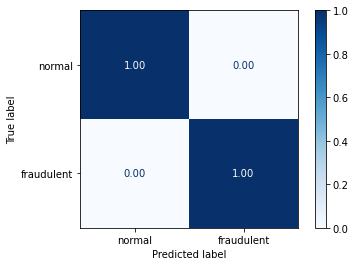

In [54]:
a, b = printDetectPredict(DT2_over, X_train_over, Y_train_over, 'DT oversampled, cv 10 fold')

pr(predict+) for DT oversampled, cv 10 fold = 1.0 
pr(predict-) for DT oversampled, cv 10 fold = 1.0 


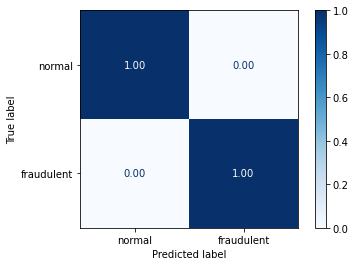

In [55]:
a, b = printDetectPredict(DT2_over, X_train_over, Y_train_over, 'DT oversampled, cv 10 fold', False)

*Precision and recall scores*

In [56]:
r, p = printRecallAndPrecision(DT2_over, X_train_over, Y_train_over)

Recall Scores
1.000
[1. 1.]
---------------------------------------
Precision Scores
1.000
[1. 1.]
---------------------------------------


*Accuracy and F1 score*

In [57]:
printAccuracyAndF1(DT2_over, X_train_over, Y_train_over, 'DT non-oversampled, cv 10 fold')

Model accuracy for DT non-oversampled, cv 10 fold: 1.0
Model F1 score for DT non-oversampled, cv 10 fold: 1.0


It can be seen that the cross-validated decision tree running on oversampled training data has perfect metrics. Given it's both unlikely to happen and that random oversampling has a tendency to overfit models this needs to be investigated. This is done in the next section

#### d) 5. Comparison and checking for overfitting

To compare the models the following steps will be done:
- calculating predict and detect for the **test** data
- calculating the accuracy and F1 scores for the **test** data
- display the calculated values for comparison
- run a simple test-train accuracy calculation based on tree depth to assess overfitting

In [58]:
#creating a list for later displaying different results on test set for model selection
# the records contain the classifier name, depth, fn and fp numbers for cost comparison, detect, predict, accuracy and f1 scores
dt_test_perf = []

**d) 5.1. Decision tree with depth = 2, no oversampling**

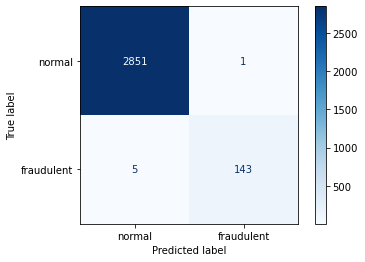

In [59]:
confusion = plot_confusion_matrix(DT, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()

In [60]:
detect_plus, detect_minus = printDetectPredict(DT, X_test, Y_test, 'DT depth=2, non-oversampled', displayMatrix = False)


pr(detect+) for DT depth=2, non-oversampled = 0.966 
pr(detect-) for DT depth=2, non-oversampled = 1.0 


In [61]:
predict_plus, predict_minus = printDetectPredict(DT, X_test, Y_test, 'DT depth=2, non-oversampled',detect = False, displayMatrix = False)


pr(predict+) for DT depth=2, non-oversampled = 0.993 
pr(predict-) for DT depth=2, non-oversampled = 0.998 


In [62]:
# reading accuracy, f1 and appending all to the overview list
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(DT, X_test, Y_test)

#adding the results to the result list
dt_test_perf.append(['DT depth=2, non-oversampled', 
                    DT.tree_.max_depth,
                    fn, fp, detect_plus, detect_minus,
                    predict_plus, predict_minus,
                    model1_test_acc, model1_test_f1] )                    

**d) 5.2. Decision tree with depth = 3, trained on oversampled data**

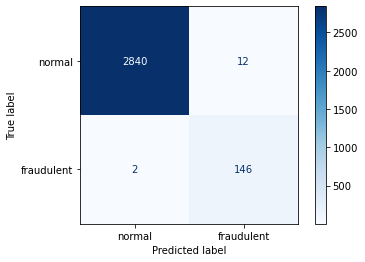

In [63]:
confusion = plot_confusion_matrix(DT_over, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()

In [64]:
detect_plus, detect_minus = printDetectPredict(DT_over, X_test, Y_test, 'DT depth = 3, oversampled', displayMatrix = False)


pr(detect+) for DT depth = 3, oversampled = 0.986 
pr(detect-) for DT depth = 3, oversampled = 0.996 


In [65]:
predict_plus, predict_minus = printDetectPredict(DT_over, X_test, Y_test, 'DT depth = 3, oversampled',detect = False, displayMatrix = False)


pr(predict+) for DT depth = 3, oversampled = 0.924 
pr(predict-) for DT depth = 3, oversampled = 0.999 


In [66]:
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(DT_over, X_test, Y_test)

dt_test_perf.append(['DT depth = 3, oversampled', 
                     DT_over.tree_.max_depth,
                     fn, fp, detect_plus, detect_minus, 
                     predict_plus, predict_minus,
                     model1_test_acc, model1_test_f1] )                     


**d) 5.3. Decision tree with 10 fold CV, no oversampling**

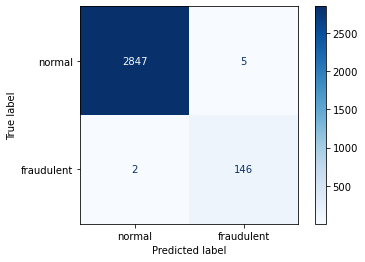

In [67]:
confusion = plot_confusion_matrix(DT2, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()

In [68]:
detect_plus, detect_minus = printDetectPredict(DT2, X_test, Y_test, 'DT 10 fold CV, non-oversampled', displayMatrix = False)


pr(detect+) for DT 10 fold CV, non-oversampled = 0.986 
pr(detect-) for DT 10 fold CV, non-oversampled = 0.998 


In [69]:
predict_plus, predict_minus = printDetectPredict(DT2, X_test, Y_test, 'DT 10 fold CV, non-oversampled',detect = False, displayMatrix = False)


pr(predict+) for DT 10 fold CV, non-oversampled = 0.967 
pr(predict-) for DT 10 fold CV, non-oversampled = 0.999 


In [70]:
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(DT2, X_test, Y_test)

dt_test_perf.append(['DT 10 fold CV, non-oversampled', 
                     DT2.tree_.max_depth,
                     fn, fp, detect_plus, 
                     detect_minus, predict_plus, predict_minus,
                     model1_test_acc, model1_test_f1] )


**d) 5.4. Decision tree with 10 fold CV, trained on oversampled data**

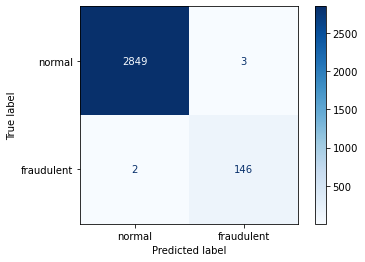

In [71]:
confusion = plot_confusion_matrix(DT2_over, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()

In [72]:
detect_plus, detect_minus = printDetectPredict(DT2_over, X_test, Y_test, 'DT 10 fold CV, oversampled', displayMatrix = False)


pr(detect+) for DT 10 fold CV, oversampled = 0.986 
pr(detect-) for DT 10 fold CV, oversampled = 0.999 


In [73]:
predict_plus, predict_minus = printDetectPredict(DT2_over, X_test, Y_test, 'DT 10 fold CV, oversampled',detect = False, displayMatrix = False)


pr(predict+) for DT 10 fold CV, oversampled = 0.98 
pr(predict-) for DT 10 fold CV, oversampled = 0.999 


In [74]:
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(DT2_over, X_test, Y_test)

dt_test_perf.append(['DT 10 fold CV, oversampled',                      
                     DT2_over.tree_.max_depth,
                     fn, fp, detect_plus, detect_minus,
                     predict_plus, predict_minus,
                     model1_test_acc, model1_test_f1] )


In [75]:
df_dt_test_perf = pd.DataFrame(dt_test_perf, columns=['Classifier', 'Depth',
                                                      'False negatives', 
                                                      'False positives', 'Detect+', 'Detect-',
                                                      'Predict+', 'Predict-', 'Accuracy', 'F1'])

The below table summarises the different Decision Tree models' performance on the **test set**

In [76]:
pd.options.display.float_format = '{:,.2f}'.format
df_dt_test_perf

,Classifier,Depth,False negatives,False positives,Detect+,Detect-,Predict+,Predict-,Accuracy,F1
0,"DT depth=2, non-oversampled",2,5,1,0.97,1.00,0.99,1.00,1.00,0.98
1,"DT depth = 3, oversampled",3,2,12,0.99,1.00,0.92,1.00,1.00,0.95
2,"DT 10 fold CV, non-oversampled",6,2,5,0.99,1.00,0.97,1.00,1.00,0.98
3,"DT 10 fold CV, oversampled",6,2,3,0.99,1.00,0.98,1.00,1.00,0.98


**d) 5.5. Analysing overfitting**

This last section of the performance comparison assesses if any (or all) of the above models may overfit the data both on non-oversampled and oversampled training data as well

In [77]:
def displayTrainTestAccuracy(depth, trainAcc, trainErr, testAcc, testErr, title):
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle(title, fontsize=12)
    fig.set_figheight(8)
    fig.set_figwidth(12)
    
    ax1.plot(depth,trainAcc,'ro-',depth,testAcc,'bv--')
    ax2.plot(depth,trainErr,'b|-',depth,testErr,'r+--')

    ax1.legend(['Training Accuracy','Test Accuracy'])
    ax2.legend(['Training Error','Test Error'])


    plt.xlabel(depth)
    plt.ylabel('Classification Error')
    plt.show()

In [282]:
# checking overfitting of decision tree and displaying chart
# code taken from exercise file
def checkOverfitting(x_train, x_test, y_train, y_test, level, title = 'Train and test accuracy and error', DecisionTree = True ):
    max_params = np.arange(1, level + 1)
    trainAcc, testAcc = np.zeros(len(max_params)), np.zeros(len(max_params))
    trainErr, testErr = np.zeros(len(max_params)), np.zeros(len(max_params))

    index = 0
    for param in max_params:
    
        if DecisionTree:
            clf = DecisionTreeClassifier(max_depth=param)
        else:
            clf = KNeighborsClassifier(param)
        clf = clf.fit(x_train, y_train)
    
        Y_predTrain = clf.predict(x_train)
        Y_predTest = clf.predict(x_test)
   
        trainAcc[index] = accuracy_score(y_train, Y_predTrain)
        testAcc[index] = accuracy_score(y_test, Y_predTest)
    
        trainErr[index] = 1-accuracy_score(y_train, Y_predTrain)
        testErr[index] = 1-accuracy_score(y_test, Y_predTest)
    
        index += 1
    
    displayTrainTestAccuracy(max_params, trainAcc, trainErr, testAcc, testErr, title)
    

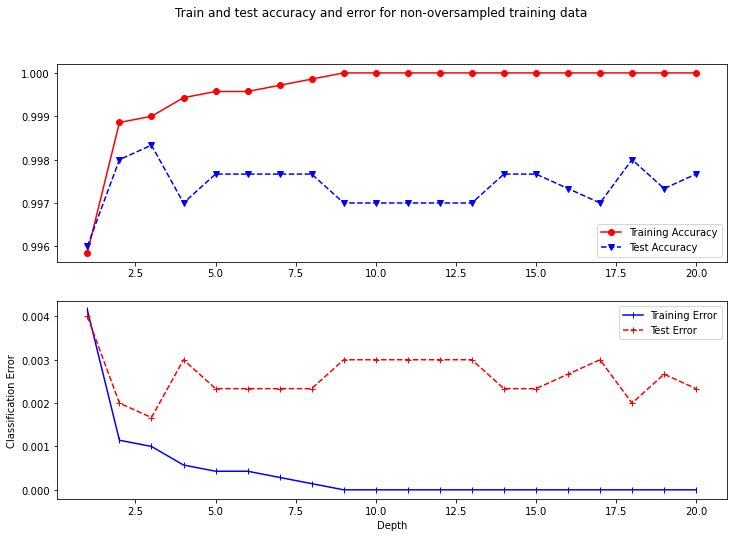

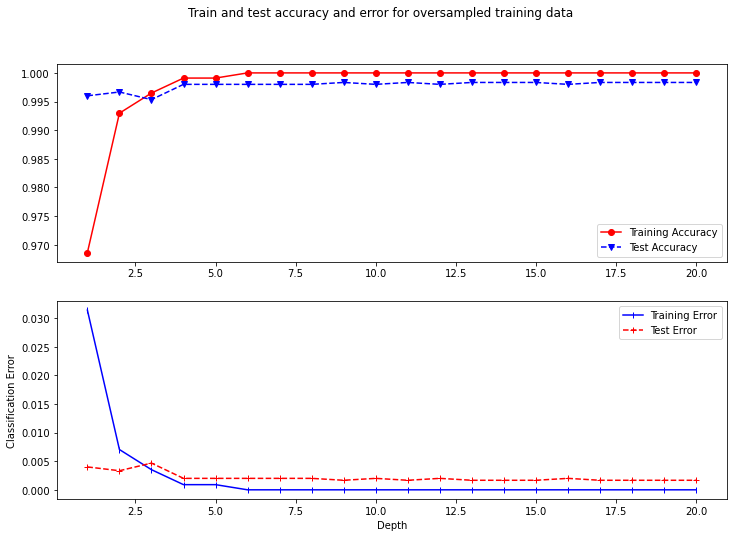

In [283]:
overfit_level = 20

# displaying overfitting for non-oversampled data
checkOverfitting(X_train, X_test, Y_train, Y_test, overfit_level, 'Train and test accuracy and error for non-oversampled training data')

# displaying overfitting for oversampled data
checkOverfitting(X_train_over, X_test, Y_train_over, Y_test, overfit_level, 'Train and test accuracy and error for oversampled training data')


### Overview of Decision Tree results, costs and selecting the recommended model

It has been proven that even a very simple shallow decision tree can classify transactions extremely well, with 99%+ accuracy. The original goals of having at least 90% detect+ and 70% predict+ have both been fulfilled by all the models

Plotting the training and test accuracy also shows that any tree with a depth over 5 would likely be overfitting, or at least would not add value. As the later section decribes this may be true from a purely technical point of view but may not be aligned with the business cost associated with errors

Lastly the below section discusses the budgetary requirements and results

**Cost of the models for the Bank**

It is known that a non-detected fraudulent transaction costs the bank £10k and has worse non-tangible effects as well. An incorrectly predicted normal transaction costs the bank £1k.

To assess the rough cost of the models for the bank the precise incurred cost can be calculated for the test set. Given that the test set is 30% of the total data set, an estimation can be made for the full set. Having the models' errors from the training set may lead to false results, hence the estimation


In [80]:
 def currency_format(x):
        return "£{:.0f}k".format(x/1000)

In [291]:
fn_cost = 10000
fp_cost = 1000

def addCostValues(dt):    
    dt['FN test cost'] = dt['False negatives']*fn_cost
    dt['FP test cost'] = dt['False positives']*fp_cost

    dt['FN total cost'] = dt['FN test cost']*3
    dt['FP total cost'] = dt['FP test cost']*3
    dt['Model total cost'] = dt['FN total cost'] + dt['FP total cost']

    #formatting, could be automated but running out of time
    dt['FN test cost'] = dt['FN test cost'].apply(currency_format)
    dt['FP test cost'] = dt['FP test cost'].apply(currency_format)
    dt['FN total cost'] = dt['FN total cost'].apply(currency_format)
    dt['FP total cost'] = dt['FP total cost'].apply(currency_format)
    dt['Model total cost'] = dt['Model total cost'].apply(currency_format)


In [292]:
addCostValues(df_dt_test_perf_display)
df_dt_test_perf_display = df_dt_test_perf.drop(columns = ['Detect+','Detect-',
                                                          'Predict+','Predict-',
                                                          'Accuracy','F1',])

As detailed in the goals section the Bank has £50k for false negatives and £30k for false positives. The below table shows the cost associated with both models run for the full data set. (false negatives cost £10k and false positives cost £1k)

In [293]:
df_dt_test_perf_display 

,Classifier,Depth,False negatives,False positives,FN test cost,FP test cost,FN total cost,FP total cost,Model total cost
0,"DT depth=2, non-oversampled",2,5,1,£50k,£1k,£150k,£3k,£153k
1,"DT depth = 3, oversampled",3,2,12,£20k,£12k,£60k,£36k,£96k
2,"DT 10 fold CV, non-oversampled",6,2,5,£20k,£5k,£60k,£15k,£75k
3,"DT 10 fold CV, oversampled",6,2,3,£20k,£3k,£60k,£9k,£69k


So while the performance metrics are really good for the trees it seems that the models **do not fit into the Bank's orignal allowed budget** as it exceeds the possible false negative count and cost of 5 (estimated) and £50k respectively. 

When analysing the results it is important to note that oversampling introduces some randomness in the code (as the oversampling a random selection with repeat), so consequitve runs can easily product different results. Multiple runs and an average cost would be a next step in determining a better model cost

#### A few iterations showed that the **optimised model trained on oversampled data** is the cheapest, so that will be further analysed and compared

## 5. k-nearest neighbours (part 2)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process (8 marks)

100-200 words


Besides 'eager learners' like decision trees, it would be good to see how a model based on different paradigm would work, i.e. 'lazy learners'. Given the relative simplicity of the case but the high dimensionality I wanted to experiment with k-nearest neighbours to see how the model would fare when looking up data with around 28 attributes. 

K-NN is quite intuitive and simple, easy to implement and provides quick results. It allows the algorithm to quickly respond to new unseen transactions when used in production. It is very simple to tune, given it only uses one hyper parameter and distance criteria.

K-NN has some difficulty working with larger number of attributes ('the curse of dimensionality'), it will be interesting to see how it fares against a decision tree which is quite strong in this aspect. It is said (Hasanat et al. 2014) that k-nn does not perform well on imbalanced data set, so this seems to be a good experiment. Similar to the Decision Tree solution both non-oversampled and random oversampled train data will used

Overall given the cons of k-nn it may not seem to be an ideal choice for the case but I wanted to see if the results prove it and how the performance differs from that of the decision tree

Below is schematic diagram of the K-NN solution from RapidMiner

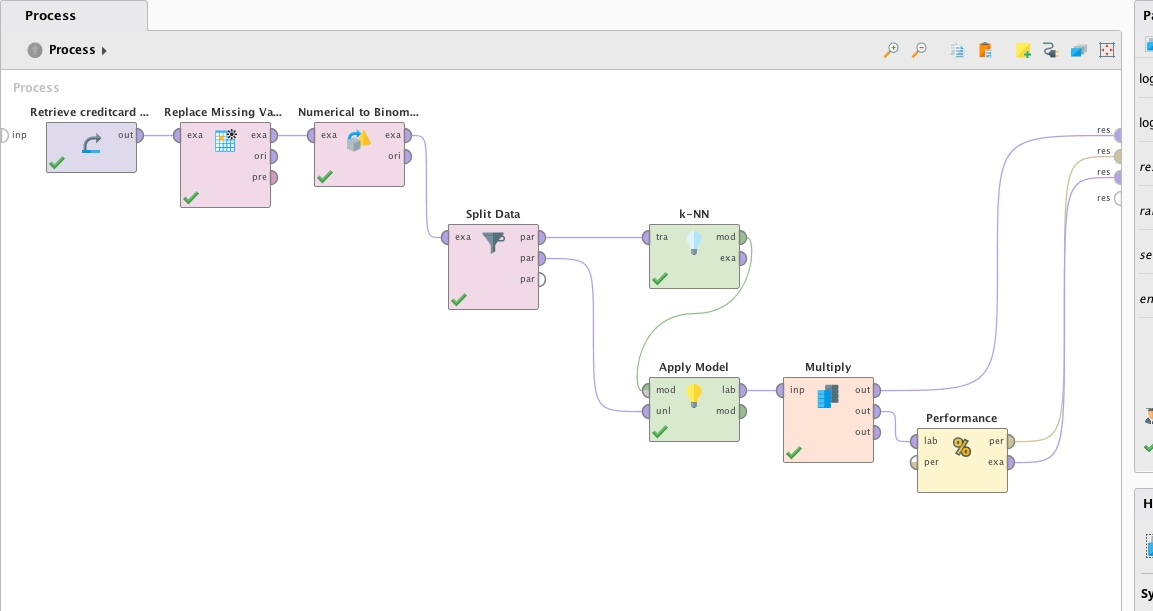

**Note** The above diagram uses a simple missing value population before data splitting for experimenting purposes

The steps to prepare the K-NN are:
- splitting the data to 70% training and 30% testing sets. To be able to compare different models the existing train-test split will be reused
- creating a KNN classifier with an initial parameter of 7
- optmizing the model by running GridSearchCV on KNN to find the ideal (or a better) parameter
- measure the performance of the solution (predict+, detect+, accuracy and F1 scores) to assess if the original performance and budget requirements are set

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (4 marks)


The initial value of K is somewhat not obvious for this data set as it has 28 attributes and setting too low will not yield good results, too high one may be computationally expensive and may lead to overfitting. There are 2 aspects considered here:
- K should be an odd number to avoid draw in the confidence scores
- one recommendation is to set k to the square root of the training data set, which for the non-oversampled case  is 6997 (70% of 9997) (Hasanat et al. 2014). For the oversampled model, the total number of training records is 11088.

Therefore the initial K is set to 83 and to 105 for the non-oversampled and for the oversampled cases

In [139]:
n_neigh = 83
n_neigh_over = 105

knn = KNeighborsClassifier(n_neigh)
knn.fit(X_train, Y_train)
print(f'knn trained with {n_neigh} neighbours')

knn_over = KNeighborsClassifier(n_neigh_over)
knn_over.fit(X_train_over, Y_train_over)
print(f'knn_over trained with {n_neigh_over} neighbours')

knn trained with 83 neighbours
knn_over trained with 105 neighbours


### c) Optimising hyper parameters (4 marks)


Below GridSearchCV is used to find a better hyper parameter K using 10 folds and accuracy as the scoring metrics. Given the initial K is set to 83 and 105, the possible range of K is quite large, between 1 and 150. 

Note: GridSearchCV runs for cca 1-2 mins on 4 cores

In [140]:
%%time
knn2 = KNeighborsClassifier()
k_range = range(1,151)
param_grid = dict(n_neighbors = list(k_range))

#using all cores to speed up the process
grid_knn = GridSearchCV(knn2, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1, n_jobs = -1)
  
# fitting the model for grid search
grid_search = grid_knn.fit(X_train, Y_train)

print(grid_search.best_params_)


Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'n_neighbors': 3}
CPU times: user 4.18 s, sys: 671 ms, total: 4.85 s
Wall time: 51.5 s


In [141]:
%%time
knn2_over = KNeighborsClassifier()
k_range = range(1,151)
param_grid = dict(n_neighbors = list(k_range))

#using all cores to speed up the process
grid_knn_over = GridSearchCV(knn2_over, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1, n_jobs = -1)

# fitting the model for grid search
grid_search_over = grid_knn_over.fit(X_train_over, Y_train_over)

print(grid_search_over.best_params_)


Fitting 10 folds for each of 150 candidates, totalling 1500 fits
{'n_neighbors': 1}
CPU times: user 4.67 s, sys: 1.52 s, total: 6.19 s
Wall time: 2min 3s


Another recommended improvement is to nornalise all the attributes for the same range. Given KNN measures the distances, it is very important to have the same dimensions across all attributes so none of them has a higher or bigger effect

**normalising all attributes**

In [142]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,"6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00",...,"6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00"
mean,-1.24,-0.35,-0.60,0.39,0.17,0.04,-0.17,-0.23,-0.22,-0.21,...,-0.00,0.12,0.26,-0.09,-0.03,-1.30,-0.08,0.04,0.04,-0.98
std,3.03,3.43,2.84,2.14,2.58,1.82,2.94,2.60,1.36,2.04,...,1.64,1.48,1.05,1.97,0.67,0.57,0.58,0.84,0.58,0.07
min,-46.86,-60.46,-31.10,-5.27,-29.73,-23.50,-43.56,-50.42,-13.43,-24.59,...,-23.42,-22.89,-9.50,-44.81,-2.54,-10.30,-2.60,-7.69,-7.76,-1.00
25%,-1.26,-0.69,-1.18,-0.88,-0.54,-0.82,-0.53,-0.33,-0.85,-0.69,...,-0.35,-0.14,-0.33,0.02,-0.40,-1.48,-0.47,-0.11,-0.03,-1.00
50%,-0.43,0.27,0.04,-0.13,0.25,-0.11,0.18,0.02,-0.12,-0.10,...,-0.08,0.09,0.26,0.20,0.03,-1.21,-0.09,0.12,0.14,-1.00
75%,-0.02,0.85,0.85,1.13,1.09,0.76,0.81,0.42,0.54,0.66,...,0.19,0.39,0.96,0.40,0.50,-1.06,0.25,0.28,0.27,-0.99
max,2.03,22.06,4.23,16.88,34.10,21.31,31.53,20.01,7.50,7.54,...,38.12,27.20,8.36,5.47,3.34,2.21,2.75,10.14,14.00,0.92


While the range differences are not extremely large, some max values are definitely higher than others. On the contrary as Amount has been scaled between -1 and 1 it may be under-represented. To eliminate the potential bias all V attributes are scaled between -1 and 1 for both train and test X as well as oversampled training X

In [143]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_train2 = X_train.copy(deep=True)
X_train2_over = X_train_over.copy(deep=True)
X_test2 = X_test.copy(deep=True)

for i in range(1,29):
    X_train2[f'V{i}'] = scaler.fit_transform(X_train2[f'V{i}'].values.reshape(-1,1))
    X_train2_over[f'V{i}'] = scaler.fit_transform(X_train2_over[f'V{i}'].values.reshape(-1,1))
    X_test2[f'V{i}'] = scaler.fit_transform(X_test2[f'V{i}'].values.reshape(-1,1))
    

display(X_train2.describe())
display(X_train2_over.describe())
X_test2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,"6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00",...,"6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00","6,997.00"
mean,0.87,0.46,0.73,-0.49,-0.06,0.05,0.16,0.43,0.26,0.52,...,-0.24,-0.08,0.09,0.78,-0.15,0.44,-0.06,-0.13,-0.28,-0.98
std,0.12,0.08,0.16,0.19,0.08,0.08,0.08,0.07,0.13,0.13,...,0.05,0.06,0.12,0.08,0.23,0.09,0.21,0.09,0.05,0.07
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,0.87,0.45,0.69,-0.60,-0.09,0.01,0.15,0.42,0.20,0.49,...,-0.25,-0.09,0.03,0.78,-0.27,0.41,-0.20,-0.15,-0.29,-1.00
50%,0.90,0.47,0.76,-0.54,-0.06,0.04,0.17,0.43,0.27,0.52,...,-0.24,-0.08,0.09,0.79,-0.13,0.45,-0.06,-0.12,-0.27,-1.00
75%,0.92,0.49,0.81,-0.42,-0.03,0.08,0.18,0.44,0.34,0.57,...,-0.23,-0.07,0.17,0.80,0.03,0.48,0.07,-0.11,-0.26,-0.99
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.92


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,"11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00",...,"11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00","11,088.00"
mean,0.81,0.50,0.58,-0.34,-0.10,0.03,0.10,0.43,0.17,0.38,...,-0.23,-0.07,0.08,0.78,-0.16,0.52,-0.04,-0.13,-0.28,-0.98
std,0.22,0.11,0.34,0.30,0.14,0.09,0.16,0.15,0.22,0.28,...,0.05,0.12,0.15,0.08,0.21,0.15,0.20,0.13,0.05,0.05
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,0.80,0.46,0.50,-0.57,-0.12,-0.02,0.09,0.42,0.09,0.29,...,-0.25,-0.09,0.02,0.78,-0.28,0.44,-0.16,-0.15,-0.29,-1.00
50%,0.89,0.48,0.71,-0.43,-0.07,0.03,0.15,0.44,0.22,0.49,...,-0.24,-0.08,0.08,0.79,-0.14,0.48,-0.05,-0.12,-0.27,-1.00
75%,0.92,0.52,0.79,-0.15,-0.04,0.07,0.18,0.45,0.31,0.55,...,-0.23,-0.06,0.15,0.80,0.00,0.64,0.09,-0.09,-0.26,-0.99
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.92


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,"3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00",...,"3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00","3,000.00"
mean,0.85,0.57,0.50,-0.49,-0.14,0.20,0.14,0.44,-0.19,-0.10,...,-0.28,0.27,0.22,0.78,-0.09,0.36,-0.10,0.37,0.34,-0.98
std,0.14,0.09,0.13,0.19,0.10,0.11,0.09,0.07,0.10,0.08,...,0.06,0.07,0.11,0.10,0.22,0.10,0.22,0.05,0.07,0.08
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,0.84,0.56,0.47,-0.60,-0.17,0.15,0.12,0.43,-0.25,-0.12,...,-0.30,0.25,0.16,0.78,-0.22,0.33,-0.24,0.36,0.33,-1.00
50%,0.88,0.59,0.53,-0.54,-0.13,0.19,0.15,0.44,-0.19,-0.09,...,-0.29,0.26,0.22,0.79,-0.07,0.38,-0.11,0.37,0.35,-1.00
75%,0.90,0.60,0.57,-0.42,-0.10,0.24,0.17,0.46,-0.14,-0.06,...,-0.28,0.28,0.30,0.80,0.08,0.41,0.02,0.38,0.37,-0.99
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Now that both train and test sets have been normalised GridSearch may return with a different result. This time it's enough to run the gridsearch for smaller range

In [144]:
%%time
knn2 = KNeighborsClassifier()
k_range = range(1,16)
param_grid = dict(n_neighbors = list(k_range))

#using all cores to speed up the process
grid_knn2 = GridSearchCV(knn2, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1, n_jobs = -1)
  
# fitting the model for grid search
grid_search = grid_knn2.fit(X_train2, Y_train)

print(grid_search.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'n_neighbors': 3}
CPU times: user 383 ms, sys: 58 ms, total: 441 ms
Wall time: 4.63 s


In [145]:
%%time
knn2_over = KNeighborsClassifier()
k_range = range(1,16)
param_grid = dict(n_neighbors = list(k_range))

#using all cores to speed up the process
grid_knn2_over = GridSearchCV(knn2_over, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1, n_jobs = -1)
  
# fitting the model for grid search
grid_search_over = grid_knn2_over.fit(X_train2_over, Y_train_over)

print(grid_search_over.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'n_neighbors': 1}
CPU times: user 495 ms, sys: 169 ms, total: 664 ms
Wall time: 11.2 s


As it can be seen normalisation did not change the recommended k values

### d) Performance metrics for training (4 marks)

Exactly as for the decision tree models, the below sections show and compare the performance of the four classifiers - the unoptimised and the one after the gridsearch for both non-oversampled and oversampled training data. 

From the goals and understanding sections it is clear that the model needs to have at 90% detect+ and at least 70% predict+ metrics. The below section displays the following for both the simple and cross-validated models:

- the confusion matrices based on training data from above (stratified splitting of 70% for training)
- predict and detect
- accuracy and F1

Given the large difference between the parameters (k=83, k=105, k=3 and k=1) emphasis will be placed on assessing overfitting 

#### d) 1. Confusion matrices and performance for the initial model (k=83)

In [239]:
# model names
knn_text = 'KNN k=83 non-oversampled, no CV'
knn_over_text = 'KNN k=105 oversampled, no CV'
knn3_text = 'KNN non-oversampled, 10 fold CV, normalised'
knn3_over_text = 'KNN oversampled, 10 fold CV, normlised'

tn: 6652, tp: 269, fn: 75, fp: 1


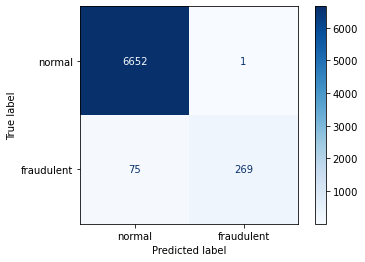

In [146]:
#printing confusion matrix and calculating accuracy for the training data...
knn1_conf_matrix = plot_confusion_matrix(knn, X_train, Y_train, display_labels=target_labels, cmap=plt.cm.Blues)

tn, fp, fn, tp = knn1_conf_matrix.confusion_matrix.ravel()
print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')

**calculating predict+, detect+, accuracy and F1 scores**

pr(detect+) for KNN k=83 non-oversampled, no CV = 0.782 
pr(detect-) for KNN k=83 non-oversampled, no CV = 1.0 


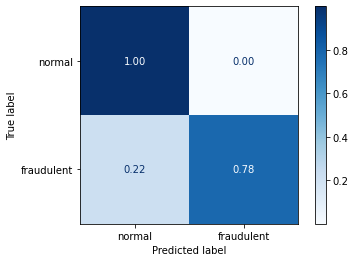

In [175]:
a,b = printDetectPredict(knn, X_train, Y_train, knn_text)

pr(predict+) for KNN k=83 non-oversampled, no CV = 0.996 
pr(predict-) for KNN k=83 non-oversampled, no CV = 0.989 


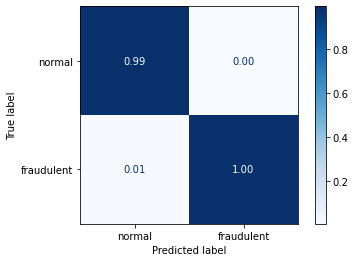

In [176]:
a,b = printDetectPredict(knn, X_train, Y_train, knn_text, detect = False)

In [177]:
printAccuracyAndF1(knn, X_train, Y_train, knn_text)

Model accuracy for KNN k=83 non-oversampled, no CV: 0.9891
Model F1 score for KNN k=83 non-oversampled, no CV: 0.8762


#### d) 2. Confusion matrices and performance for the initial model with oversampling (k=105)

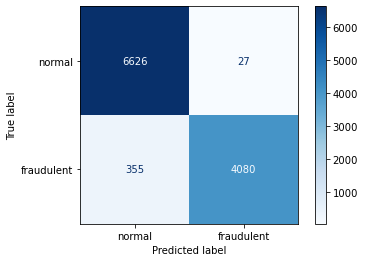

In [150]:
knn1_over_conf_matrix = plot_confusion_matrix(knn_over, X_train_over, Y_train_over, display_labels=target_labels, cmap=plt.cm.Blues)


**calculating predict+, detect+, accuracy and F1 scores**

pr(detect+) for KNN k=105 oversampled, no CV = 0.92 
pr(detect-) for KNN k=105 oversampled, no CV = 0.996 


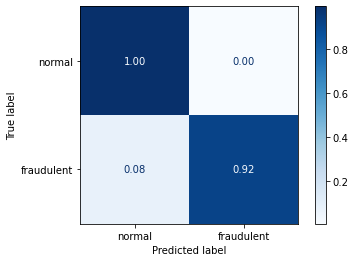

In [178]:
a,b = printDetectPredict(knn_over, X_train_over, Y_train_over, knn_over_text)

pr(predict+) for KNN k=105 oversampled, no CV = 0.993 
pr(predict-) for KNN k=105 oversampled, no CV = 0.949 


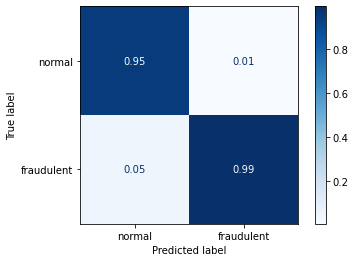

In [179]:
a,b = printDetectPredict(knn_over, X_train_over, Y_train_over, knn_over_text, detect = False)

In [180]:
printAccuracyAndF1(knn_over, X_train_over, Y_train_over, knn_over_text)

Model accuracy for KNN k=105 oversampled, no CV: 0.9655
Model F1 score for KNN k=105 oversampled, no CV: 0.9553


As can be seen above, both initial models fulfill both the 70% detect+ and 90% predict+ expectations and both the accuracy and the F1 scores are adequately high. For the non-oversampled initial model detect+ seems to be much lower, so overfitting needs to be checked. 

#### d) 3. Confusion matrices and performance for the optimised model (10 fold CV, non-oversampled normalised)

In [181]:
knn3_neigh = grid_search.best_params_['n_neighbors']
knn3_text = f'{knn3_text}, neighbours: {knn3_neigh}'
knn3 = KNeighborsClassifier(knn3_neigh)
knn3.fit(X_train2, Y_train) #using the normalised dataframe

KNeighborsClassifier(n_neighbors=3)

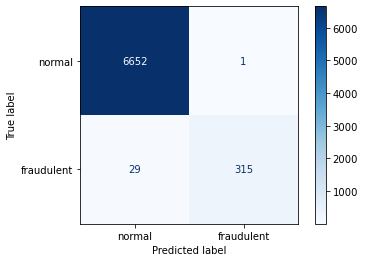

In [182]:
knn3_conf_matrix = plot_confusion_matrix(knn3, X_train2, Y_train, display_labels=target_labels, cmap=plt.cm.Blues)


**calculating predict+, detect+, accuracy and F1 scores**

pr(detect+) for KNN non-oversampled, 10 fold CV, neighbours: 3 = 0.916 
pr(detect-) for KNN non-oversampled, 10 fold CV, neighbours: 3 = 1.0 


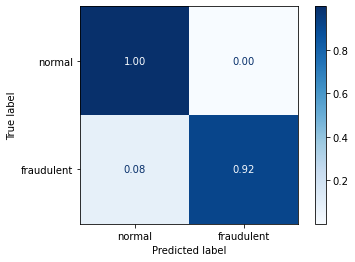

In [183]:
a,b = printDetectPredict(knn3, X_train2, Y_train, knn3_text)


pr(predict+) for KNN, 10 fold CV, no oversampling, neighbours: 3 = 0.997 
pr(predict-) for KNN, 10 fold CV, no oversampling, neighbours: 3 = 0.996 


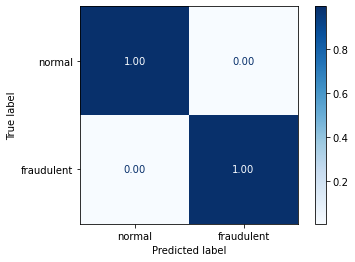

In [161]:
a,b = printDetectPredict(knn3, X_train2, Y_train, knn3_text, detect = False)


In [163]:
printAccuracyAndF1(knn3, X_train2, Y_train, knn3_text)

Model accuracy for KNN, 10 fold CV, no oversampling, neighbours: 3: 0.9957
Model F1 score for KNN, 10 fold CV, no oversampling, neighbours: 3: 0.9545


#### d) 4. Confusion matrices and performance for the optimised model (10 fold CV with oversampling, normalised)

In [184]:
knn3_neigh_over = grid_search_over.best_params_['n_neighbors']
knn3_over_text = f'{knn3_over_text}, neighbours: {knn3_neigh_over}'
knn3_over = KNeighborsClassifier(knn3_neigh_over)
knn3_over.fit(X_train2_over, Y_train_over) #using the normalised dataframe

KNeighborsClassifier(n_neighbors=1)

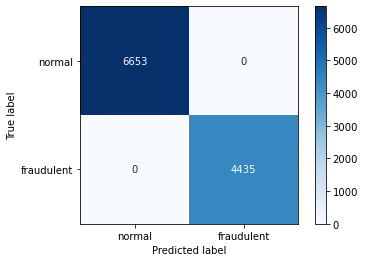

In [185]:
knn3_over_conf_matrix = plot_confusion_matrix(knn3_over, X_train2_over, Y_train_over, display_labels=target_labels, cmap=plt.cm.Blues)


**calculating predict+, detect+, accuracy and F1 scores**

pr(detect+) for KNN oversampled, 10 fold CV, neighbours: 1 = 1.0 
pr(detect-) for KNN oversampled, 10 fold CV, neighbours: 1 = 1.0 


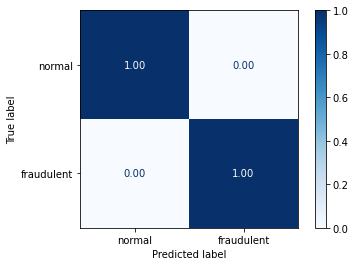

In [186]:
a,b = printDetectPredict(knn3_over, X_train2_over, Y_train_over, knn3_over_text)


pr(predict+) for KNN oversampled, 10 fold CV, neighbours: 1 = 1.0 
pr(predict-) for KNN oversampled, 10 fold CV, neighbours: 1 = 1.0 


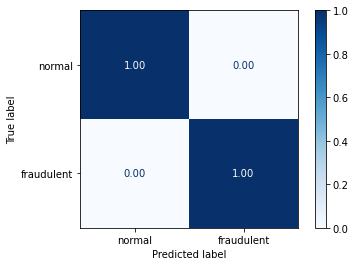

In [187]:
a,b = printDetectPredict(knn3_over, X_train2_over, Y_train_over, knn3_over_text, detect = False)


In [188]:
printAccuracyAndF1(knn3_over, X_train2_over, Y_train_over, knn3_over_text)

Model accuracy for KNN oversampled, 10 fold CV, neighbours: 1: 1.0
Model F1 score for KNN oversampled, 10 fold CV, neighbours: 1: 1.0


The optimised versions of the KNN classifiers seem to perform better, however, the oversampled classifier - probably due to the high number of redundant, duplicate positive training samples - seem to greatly overfit the training data. This will be validated in the overfitting and model testing sections

#### d) 3. Comparison and checking for overfitting

To compare the models the following steps will be done:
- calculating predict and detect for the **test** data
- calculating the accuracy and F1 scores for the **test** data
- display the calculated values for comparison
- run a simple test-train accuracy calculation based on varying k to assess overfitting for all the models

In [260]:
#creating a list for later displaying different results on test set for model selection
# the records contain the classifier name, k value, fn and fp numbers for cost comparison, detect, predict, accuracy and f1 scores
knn_test_perf = []

**d) 3.1. KNN k = 83, no oversampling**

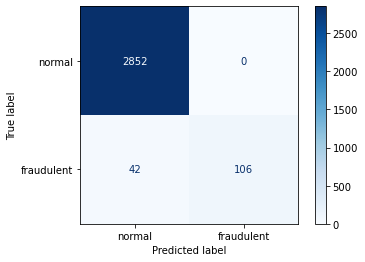

In [261]:
confusion = plot_confusion_matrix(knn, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()

In [262]:
detect_plus, detect_minus = printDetectPredict(knn, X_test, Y_test, knn_text, displayMatrix = False)


pr(detect+) for KNN k=83 non-oversampled, no CV = 0.716 
pr(detect-) for KNN k=83 non-oversampled, no CV = 1.0 


In [263]:
predict_plus, predict_minus = printDetectPredict(knn, X_test, Y_test, knn_text ,detect = False, displayMatrix = False)


pr(predict+) for KNN k=83 non-oversampled, no CV = 1.0 
pr(predict-) for KNN k=83 non-oversampled, no CV = 0.985 


In [264]:
# reading accuracy, f1 and appending all to the overview list
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(knn, X_test, Y_test)

#adding the results to the result list - TODO, remove magic strings
knn_test_perf.append([knn_text, 
                    83,
                    fn, fp, detect_plus, detect_minus,
                    predict_plus, predict_minus,
                    model1_test_acc, model1_test_f1] )                    

**d) 3.2. KNN k = 105 with oversampling**

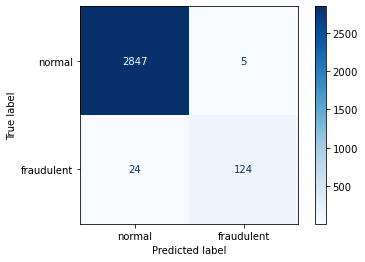

In [265]:
confusion = plot_confusion_matrix(knn_over, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()

In [266]:
detect_plus, detect_minus = printDetectPredict(knn_over, X_test, Y_test, knn_text, displayMatrix = False)


pr(detect+) for KNN k=83 non-oversampled, no CV = 0.838 
pr(detect-) for KNN k=83 non-oversampled, no CV = 0.998 


In [267]:
predict_plus, predict_minus = printDetectPredict(knn_over, X_test, Y_test, knn_text ,detect = False, displayMatrix = False)


pr(predict+) for KNN k=83 non-oversampled, no CV = 0.961 
pr(predict-) for KNN k=83 non-oversampled, no CV = 0.992 


In [268]:
# reading accuracy, f1 and appending all to the overview list
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(knn_over, X_test, Y_test)

#adding the results to the result list - TODO, remove magic strings
knn_test_perf.append([knn_over_text, 
                    105,
                    fn, fp, detect_plus, detect_minus,
                    predict_plus, predict_minus,
                    model1_test_acc, model1_test_f1] )                    

**d) 3.3. KNN 10 fold CV, no oversampling, normalised**

tp: 121, tn: 2847, fn:27, fp:5


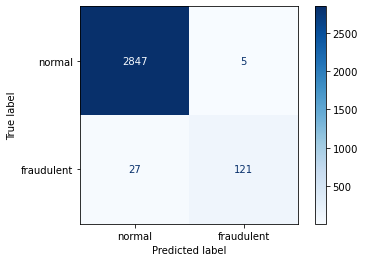

In [269]:
confusion = plot_confusion_matrix(knn3, X_test2, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()
print(f'tp: {tp}, tn: {tn}, fn:{fn}, fp:{fp}')

In [270]:
detect_plus, detect_minus = printDetectPredict(knn3, X_test2, Y_test, knn3_text, displayMatrix = False)


pr(detect+) for KNN non-oversampled, 10 fold CV, normalised = 0.818 
pr(detect-) for KNN non-oversampled, 10 fold CV, normalised = 0.998 


In [271]:
predict_plus, predict_minus = printDetectPredict(knn3, X_test2, Y_test, knn_text ,detect = False, displayMatrix = False)


pr(predict+) for KNN k=83 non-oversampled, no CV = 0.96 
pr(predict-) for KNN k=83 non-oversampled, no CV = 0.991 


In [272]:
# reading accuracy, f1 and appending all to the overview list
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(knn, X_test, Y_test)

#adding the results to the result list - TODO, remove magic strings
knn_test_perf.append([knn3_text, 
                    knn3_neigh,
                    fn, fp, detect_plus, detect_minus,
                    predict_plus, predict_minus,
                    model1_test_acc, model1_test_f1] )                    

**d) 3.4. KNN 10 fold CV with oversampling, normalised**

tp: 128, tn: 2830, fn:20, fp:22


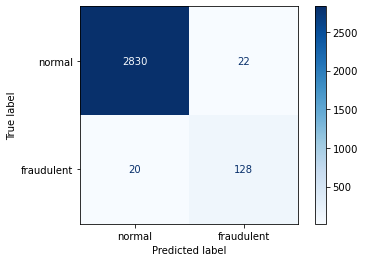

In [273]:
confusion = plot_confusion_matrix(knn3_over, X_test2, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)
tn, fp, fn, tp = confusion.confusion_matrix.ravel()
print(f'tp: {tp}, tn: {tn}, fn:{fn}, fp:{fp}')

In [274]:
detect_plus, detect_minus = printDetectPredict(knn3_over, X_test2, Y_test, knn3_over_text, displayMatrix = False)


pr(detect+) for KNN oversampled, 10 fold CV, normlised = 0.865 
pr(detect-) for KNN oversampled, 10 fold CV, normlised = 0.992 


In [275]:
predict_plus, predict_minus = printDetectPredict(knn3_over, X_test2, Y_test, knn3_over_text ,detect = False, displayMatrix = False)


pr(predict+) for KNN oversampled, 10 fold CV, normlised = 0.853 
pr(predict-) for KNN oversampled, 10 fold CV, normlised = 0.993 


In [276]:
# reading accuracy, f1 and appending all to the overview list
model1_test_acc, model1_test_f1  = getAccuracyAndF1Score(knn, X_test, Y_test)

#adding the results to the result list - TODO, remove magic strings
knn_test_perf.append([knn3_over_text, 
                    knn3_neigh_over,
                    fn, fp, detect_plus, detect_minus,
                    predict_plus, predict_minus,
                    model1_test_acc, model1_test_f1] )                    

In [277]:
df_knn_test_perf = pd.DataFrame(knn_test_perf, columns=['Classifier', 'K value',
                                                      'False negatives', 
                                                      'False positives', 'Detect+', 'Detect-',
                                                      'Predict+', 'Predict-', 'Accuracy', 'F1'])

The below table summarises the different KNN models' performance on the **test set**

In [278]:
pd.options.display.float_format = '{:,.2f}'.format
df_knn_test_perf

,Classifier,K value,False negatives,False positives,Detect+,Detect-,Predict+,Predict-,Accuracy,F1
0,"KNN k=83 non-oversampled, no CV",83,42,0,0.72,1.00,1.00,0.99,0.99,0.83
1,"KNN k=105 oversampled, no CV",105,24,5,0.84,1.00,0.96,0.99,0.99,0.90
2,"KNN non-oversampled, 10 fold CV, normalised",3,27,5,0.82,1.00,0.96,0.99,0.99,0.83
3,"KNN oversampled, 10 fold CV, normlised",1,20,22,0.86,0.99,0.85,0.99,0.99,0.83


It can be seen that the optimised and oversampled model (slightly) outperforms the other models. The number of false negatives - which is the main driving factor as discussed later - is roughly the same. It also has to be noted that the main recommendation of the square root of the number of training examples seems to be inadeqaute for this imbalanced case. 

**Checking for overfitting**

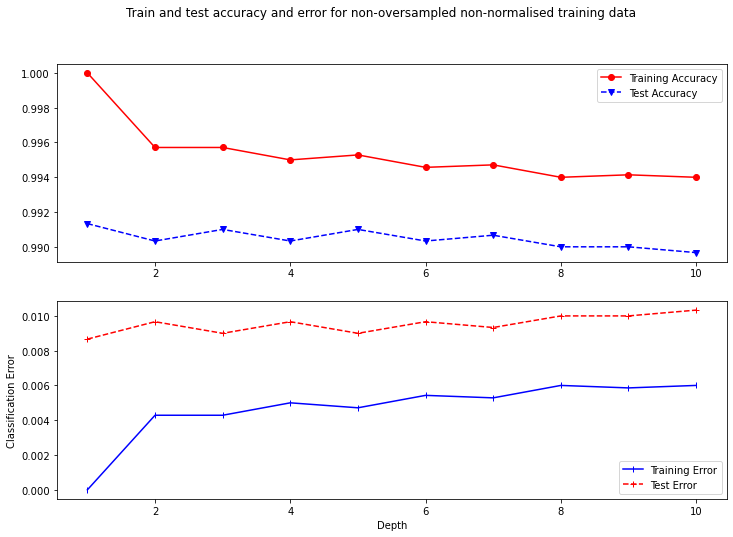

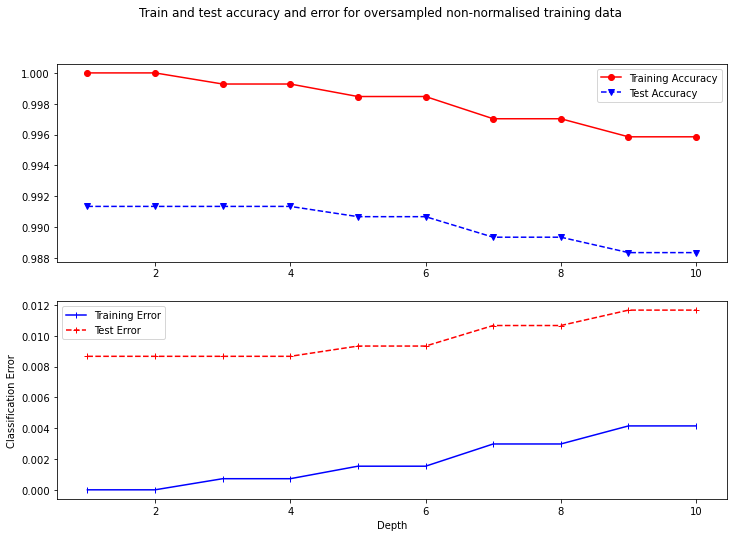

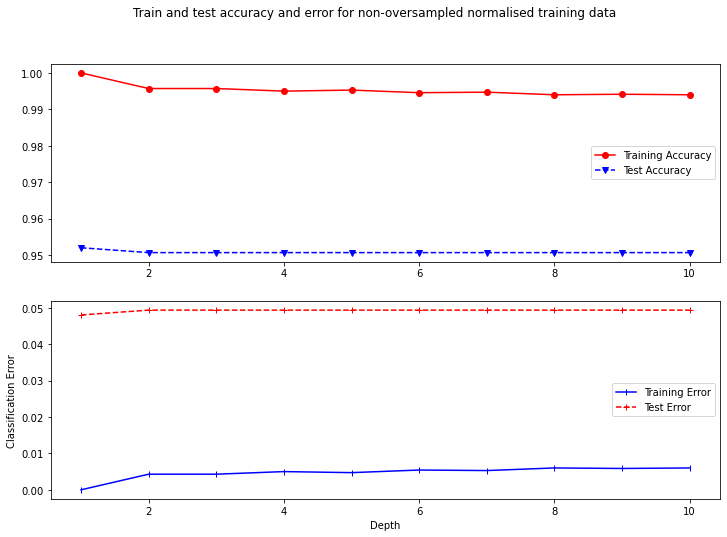

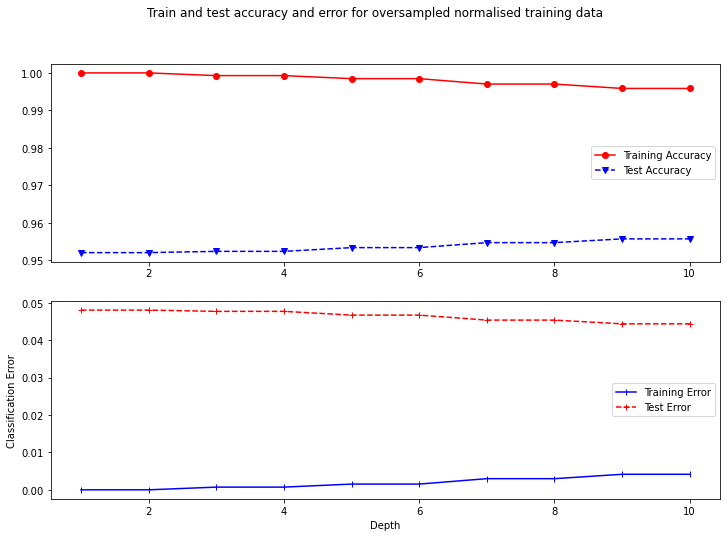

In [290]:
overfit_level = 10
# displaying overfitting for non-oversampled data
checkOverfitting(X_train, X_test, Y_train, Y_test, overfit_level, 'Train and test accuracy and error for non-oversampled non-normalised training data', DecisionTree = False)

# displaying overfitting for oversampled data
checkOverfitting(X_train_over, X_test, Y_train_over, Y_test, overfit_level, 'Train and test accuracy and error for oversampled non-normalised training data', DecisionTree = False)

# displaying overfitting for non-oversampled normalised data
checkOverfitting(X_train, X_test2, Y_train, Y_test, overfit_level, 'Train and test accuracy and error for non-oversampled normalised training data', DecisionTree = False)

# displaying overfitting for oversampled data
checkOverfitting(X_train_over, X_test2, Y_train_over, Y_test, overfit_level, 'Train and test accuracy and error for oversampled normalised training data', DecisionTree = False)



It can be seen that any KNN with k>4 can be considered overfitting as both the training and test error keeps increasing 

### Overview of KNN results, costs and selecting the recommended model

It has been shown that a simple KNN with very low k values can be good for predicting unseen fraudulent transactions. Model accuracy and F1 scores are both higher than 0.8 while both of the original goals of 70% detect+ and 90% predict+ are fulfilled. 

Plotting the training and test accuracy also shows that increasing k would immediately start to overfit the data and the original assumption of k = sqrt(n) would result in a seriously overfit 

Lastly the below section discusses the budgetary requirements and results as this seem to be the main distinguishing factor

**Cost of the models for the Bank**

It is known that a non-detected fraudulent transaction costs the bank £10k and has worse non-tangible effects as well. An incorrectly predicted normal transaction costs the bank £1k.

To assess the rough cost of the models for the bank the precise incurred cost can be calculated for the test set. Given that the test set is 30% of the total data set, an estimation can be made for the full set. Having the models' errors from the training set may lead to false results, hence the estimation

Constants and helper functions are reused from the first technique

In [295]:
addCostValues(df_knn_test_perf)

df_knn_test_perf_display = df_knn_test_perf.drop(columns = ['Detect+','Detect-',
                                                          'Predict+','Predict-',
                                                          'Accuracy','F1',])

df_knn_test_perf_display

,Classifier,K value,False negatives,False positives,FN test cost,FP test cost,FN total cost,FP total cost,Model total cost
0,"KNN k=83 non-oversampled, no CV",83,42,0,£420k,£0k,£1260k,£0k,£1260k
1,"KNN k=105 oversampled, no CV",105,24,5,£240k,£5k,£720k,£15k,£735k
2,"KNN non-oversampled, 10 fold CV, normalised",3,27,5,£270k,£5k,£810k,£15k,£825k
3,"KNN oversampled, 10 fold CV, normlised",1,20,22,£200k,£22k,£600k,£66k,£666k


So while the performance metrics are decently good for both of the KNN classifiers, neither of them seems to be very cheap for the bank. This is caused by the high number of false negatives. If the Bank has £50k for false negatives, neither model would be acceptable

As shown in a later section the cost of any of the KNN models is a magnitude higher than that of a better  Decision Tree model

When analysing the results it is important to note that oversampling introduces some randomness in the code (as the oversampling a random selection with repeat), so consequitve runs can easily product different results. Multiple runs and an average cost would be a next step in determining a better model cost


#### Out of the KNN classifiers, the one with cross validation and normalisation will be further analysed 


## 6. Comparison of metrics performance for testing 
Enter the correct code in the cells below to execute each of the stated sub-tasks. 

In the below sections the two better solutions from both design will be compared, namely the optimised Decision Tree (depth = 5, cv 10 fold) and the KNN with k=4 on normlised train and test data

Besides detect, predict, accuracy and F1 additional measures such as AUC will be used to compare the models' performance


### a) Use of cross validation for both techniques to deal with over-fitting (4 marks)

Most of the tasks have already been done in previous sections, so below is a copy of the results for both Decision Tree and KNN. For the details please see Sections 3.c and 4.c for decision tree and KNN respectively

**Cross validation for decisioon tree**

the original decision tree had a depth of the looked like as follows:

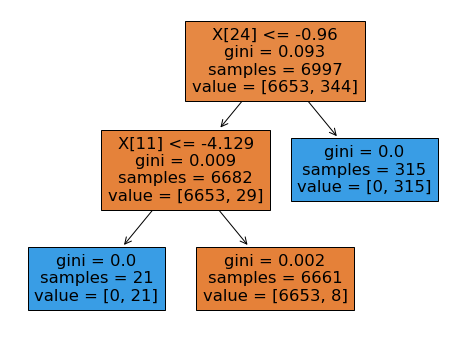

In [108]:
plt.figure(figsize=(8, 6))
plot_tree(DT, filled=True)
plt.show()

Running GridSearchCV with the following parameters:
- criterion: {'gini','entropy'}
- max_depth: {1, ... ,10}
- min_samples_split: {2, ... ,10} - has to be greater than 1
- min_samples_leaf: {1,2, ... ,5}

yielded the following improved tree:

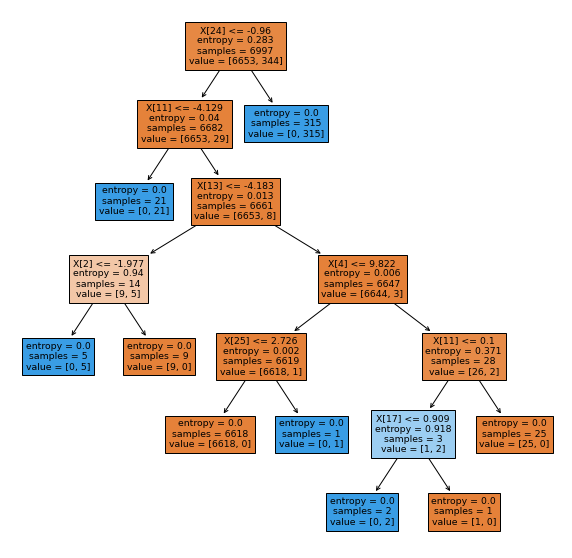

In [109]:
plt.figure(figsize=(10, 10))
plot_tree(DT2, filled=True)
plt.show()

Checking for overfitting has also shown that the tree depth is well set for 5 as a tree deeper than that would overfit the data (training error decreases, testing increaes)

In [110]:
displayTrainTestAccuracy(max_depths, trainAcc, trainErr, testAcc, testErr)

NameError: name 'max_depths' is not defined

**Cross validation for KNN**

As shown above the initial k value was taken as the square root of n, the number of training examples. Given the high number of training records (close to 7000) this was set to 83, which turned out to be exceedingly high. Cross validation has shown that a much much simpler KNN model with k=4 is better. 

Below are the summary for both k=83 and k=4 models. For further details please see section 3.d.3

|  | KNN-1 k=83 | KNN-2 (k=4, normalised) |
| --- | --- | --- |
| predict+ | 1.0 | 0.9252 |
| predict- | 0.9906 | 0.9958 |
| detect+ | 0.8176 | 0.9189 |
| detect- | 1.0 | 0.9961 |
| accuracy (test) | 0.991 | 0.9923 |
| F1 (test) | 0.9953 | 0.996 |

**Note:** due to the limitation of allowed extensions and modules, the values above are copied and not referenced, so if i.e. random seed or accuracy changes these will be out of synch

It is also clear from the below chart that any KNN model with more than 4 neighbours would overfit the data

In [ ]:
displayTrainTestAccuracy(k_values, trainAcc2, trainErr2, testAcc2, testErr2)

### b) Comparison with appropriate metrics for testing (8 marks)

In this section the better models of both Decision Trees and KNN classifiers are compared via the precision, recall, accuracy and F1 scores on **test data**. Other aspects (i.e. budgetary considerations) are discussed later. 

For the detailed calculations please see the respective sections

**Decision Tree (cv 10 fold, depth = 5)**

In [ ]:
DT_test_confusion = plot_confusion_matrix(DT2, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)

Measuring detect+ and predict+ for the decision tree as those were given as expectations in the business case

In [ ]:
dt_test_detect_plus = DT_test_confusion.confusion_matrix[0,0]/(DT_test_confusion.confusion_matrix[0,0]+DT_test_confusion.confusion_matrix[0,1])
dt_test_predict_plus = DT_test_confusion.confusion_matrix[0,0]/(DT_test_confusion.confusion_matrix[0,0] + DT_test_confusion.confusion_matrix[1,0])
print(f'pr(detect+) for DT depth=5 = {round(dt_test_detect_plus,3)}')
print(f'pr(predict+) for DT depth=5 = {round(dt_test_predict_plus,3)}')


In [ ]:
printPrecisionAndRecall(DT2,X_test, Y_test)

In [ ]:
printAccuracyAndF1(DT2, X_test, Y_test)

**KNN (k=4, normalised data, cv 10 fold)**

In [ ]:
knn_test_confusion = plot_confusion_matrix(knn3, X_test2, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)

Measuring detect+ and predict+ for the KNN model al well

In [ ]:
knn_test_detect_plus = knn_test_confusion.confusion_matrix[0,0]/(knn_test_confusion.confusion_matrix[0,0]+knn_test_confusion.confusion_matrix[0,1])
knn_test_predict_plus = knn_test_confusion.confusion_matrix[0,0]/(knn_test_confusion.confusion_matrix[0,0] + knn_test_confusion.confusion_matrix[1,0])
print(f'pr(detect+) for knn k=4 = {round(knn_test_detect_plus,3)}')
print(f'pr(predict+) for knn k=4 = {round(knn_test_predict_plus,3)}')


In [ ]:
printPrecisionAndRecall(knn3,X_test2, Y_test)

In [ ]:
printAccuracyAndF1(knn3, X_test2, Y_test)

**The below table summarises the 'standard' performance metrics of the two designs on the test data**

|  | Decision tree (depth = 5) | KNN (k=4, normalised) |
| --- | --- | --- |
| detect+ | 0.98 | 0.919 |
| predict+ | 0.993 | 0.925 |
| precision | 0.990 | 0.958 |
| recall | 0.996 | 0.960 |
| accuracy (test) | 0.999 | 0.9923 |
| F1 (test) | 0.999 | 0.996 |



It can be seen that both models fulfill the original goals of havinh 90% precision ands 70% recall but they of course differ in the nummber of false positive and negative classifications, however, **due to the highly imbalanced data** these metrics are skewed and overrepresent true positive and true negative cases

### c) Model selection (ROC or other charts) (4 marks)

As seen above the usual metrics that are very good for balanced cases do not necessirily answer the question which of them should work better for the Bank's use case?

It has been shown that for imbalanced data sets other metrics are more useful. The below section will look into ROC AUC, Precision-Recall and F2 score. 

Provost et al. (1998) proposed ROC (receiver operating characteristics) and AUC (area under ROC curve) as alternatives to accuracy and this is particularly useful for imbalanced cases (as highlighted in [Branco et al, 2015](https://arxiv.org/abs/1505.01658), [Y. Sun et al, 2011](https://www.researchgate.net/publication/263913891_Classification_of_imbalanced_data_a_review) and [L. Wang et al, 2021]( https://ieeexplore.ieee.org/document/9408661).

Similarly, Precision-Recall curves will be plotted for both models

As [this article](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/) suggests F2 score could be an important metrics here as the false negatives are more costly. F2 score for both models is hence provided below. 

Finally, as a domain-based cost evaluation the expected incurred costs of both models is calculated on the test set as this would be a direct effect on the Bank's financials. 

Based on the ROC AUC, Precision-Recall AUC, F2 score and test set cost comparison a recommended model is chosen

An important remark here is that due to the premises of this assignment the use of a specialised library (imbalanced-learn) was not allowed to be used - using imbalanced-learn would have provided quick insight into i.e. oversampling and undersampling. These will be tackled in a possible subsequent work

**ROC and Precision-Recall curves for Decision Tree and KNN**

In [ ]:
# setup - to be reused for all metrics
classifiers = [[DT2,X_test],[knn3,X_test2]]

In [ ]:
# we have DT2 and knn3 classifiers already there
# original code partly from https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot 

def runROC_PredictRecall(classifier, X_test):
    yproba = classifier.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    # calculating predict / recall curve values again
    prec, recall, thresholds = precision_recall_curve(Y_test, yproba)
    
    return fpr, tpr, auc, prec, recall, thresholds



In [ ]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','prec','recall','th'])

for classifier in classifiers:
    fpr, tpr, auc, prec, recall, thresholds = runROC_PredictRecall(classifier[0], classifier[1])
    #print(f'fpr: {fpr}, tpr:{tpr}, auc:{auc} ')
        
    result_table = result_table.append({'classifiers':classifier[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'prec':prec,
                                        'recall':recall,
                                        'th':thresholds
                                       }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

Printing the curves

In [ ]:
result_table

In [ ]:
fig = plt.figure(figsize=(7,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
fig = plt.figure(figsize=(7,5))

for i in result_table.index:
    plt.plot(result_table.loc[i]['prec'], 
             result_table.loc[i]['recall'], 
             label=f'{i}')
    
plt.plot([0.94,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.94, 1.0, step=0.01))
plt.xlabel("Precision", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Recall", fontsize=15)

plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

As it can be seen the precision-recall curve does not really add any new information

**F2 scores for Decision Tree and KNN**

As mentioned above F2 score seems to be a good candidate to be able to compare the models. The reason is that in the business use case a False Negative causes more damage and hence is more important than a False Positive. 

Following the below schematic overview (from [here](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/) ) the positive classes (fraudulent transactions) are more important and false negatives are more important (cost £10k vs. £1k for false positives)

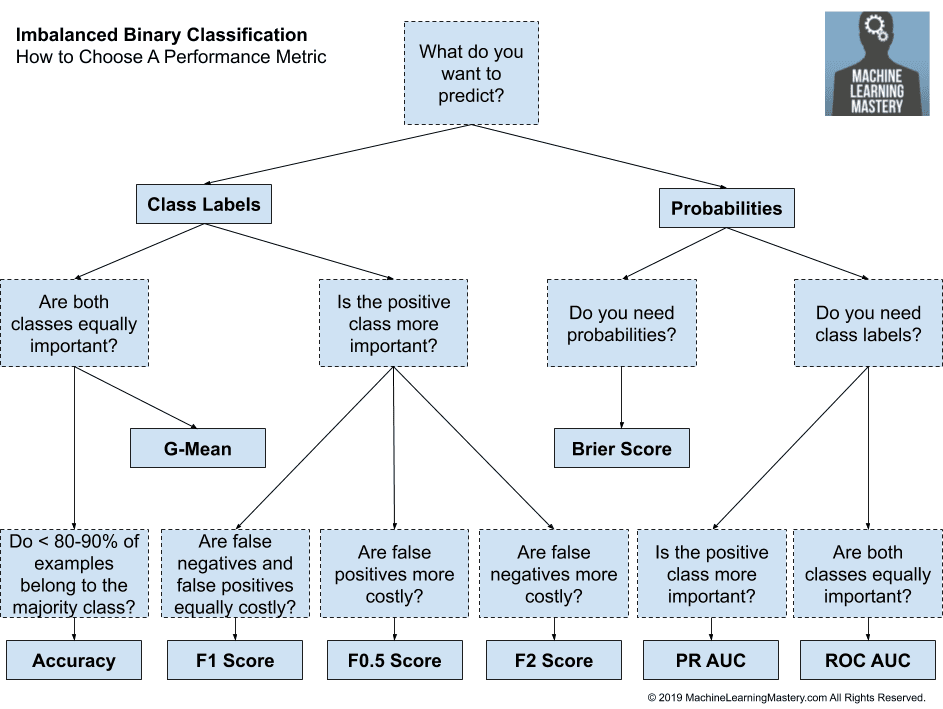

F2 has the effect of lowering the importance of precision (it is high enough for both cases and false positives cost 1/10th) and increases the importance of recall, hence 'penalising' false negatives

In [ ]:
def calculateF2(classifier, X_test):
    y_pred = classifier.predict(X_test)
    p = precision_score(Y_test, y_pred)
    r = recall_score(Y_test, y_pred)
    f = fbeta_score(Y_test, y_pred, beta=2.0)
    return f
    

In [ ]:
for classifier in classifiers:
    f = calculateF2(classifier[0], classifier[1])
    print(f'F2 score for {classifier[0].__class__.__name__ } is {round(f,4)}')

**Incurred cost comparison of Decision Tree and KNN**

Essentially the most important non-technical metrics, how much cost would the prediction incur for the Bank? This is quite straightforward answer as the number of false positives and false negatives can be 'priced'

*Cost of Decision Tree*

In [ ]:
#printing the confusion matrix for the number of errors
dt_confusion   = plot_confusion_matrix(DT2, X_test, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)

It is easy to see that for the test data set the decision tree would cost the Bank **3 \* £10k + 1 \* £1k = £31k**

*Cost of KNN classifier*

In [ ]:
knn_confusion   = plot_confusion_matrix(knn3, X_test2, Y_test, display_labels=target_labels, cmap=plt.cm.Blues)

Similarly, for the KNN model, the test data would cost the Bank: **12 \* £10k + 11 \* £1k = £131k**

*Cost comparison chart*

Below is the summary of the incurred costs for both models

In [ ]:
# barplot function, originally from https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


In [ ]:
d_fn = dt_confusion.confusion_matrix[0][1]*10000
d_fp = dt_confusion.confusion_matrix[1][0]*1000 
d_cost = [d_fn, d_fp, d_fn + d_fp]
k_fn = knn_confusion.confusion_matrix[0][1]*10000
k_fp = knn_confusion.confusion_matrix[1][0]*1000 
k_cost = [k_fn, k_fp, k_fn + k_fp]

data = {
    'Decision Tree': d_cost,
    'KNN': k_cost
}


fig, ax = plt.subplots()
fig.suptitle('Cost comparison of classifier models', fontsize=14)
fig.set_figheight(7)
fig.set_figwidth(11)
bar_plot(ax, data, total_width=.8, single_width=.9)

#formatting axis values 
ax.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(lambda x, p: '£'+ format(int(x), ',')))

#changing x labels
labels = ['false negatives', 'false positives', 'total']
a=ax.get_xticks().tolist()
to_change = [2, 4, 6]
for idx, label in enumerate(a):
    if idx in to_change:
        a[idx] = labels[to_change.index(idx)]
    else:
        a[idx] = ''


ax.get_xaxis().set_major_formatter(
mpl.ticker.FuncFormatter(lambda x, p: a[p]))

plt.show()


It can be seen that from the cost point of view there is a significant difference between the two models, and the reason for that is that the **Decisiton Tree** has much less false negatives.

Moreover, the original expectations form BitsBank were that the model has to fit into £30k and £50k for false positives and false negatives. **This expectation is not fulfilled by the KNN classifier on the test data**

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)

100-200 words


Purely from a technical perspective both the Decision Tree and the KNN approaches have yielded simple, effective and well performing results with low error. Accuracy and F1 / F2 scores for both optimised models were higher than 0.99. Precision, recall, AUC, however, did show a cca. 0.3 - 0.7 difference between them, **the Decision Tree slightly outperformed the KNN model**.

Surprisingly both approaches have **started to overfit the data quite quickly**, tree with a depth of 5+ and KNN with neighbours more than 4 started to overfit the data and started increasing the training error.

Both models were rather **quick to train** and given enough cores GridSearch also ran with acceptable speed for decision tree. Optimisation for KNN ran faster even for high (k=150) parameter values

KNN is more prone to errors due to the high dimensionality of the problem. If at a later point the Bank will need to change some of input data, i.e. adding some more features, KNN will have a harder time to maintain its accuracy, so **from a flexibility point of view decision tree is favoured**

The below table summarises the comparison 


|  | Decision tree (depth = 5) | KNN (k=4, normalised) |
| --- | --- | --- |
| performance | Exceptional | Very good |
| complexitiy | Very good | Very good |
| training speed | Good | Very good |
| flexibility | Very good | OK |


**From a technical point of view a Decision Tree with depth = 5 is recommended for BitsBank**

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)

100-200 words

From a business perspective there are some bigger differences between the model and here the decision tree is clearly favourable to an extent that KNN may not even be acceptable.

As the direct cost associated with testing error was given by BitsBank a simple financial effect comparison could be done. KNN produces a **much higher number of false positives** which is a really big and expensive issue for the bank. Based on the test data the decision tree model would cost the Bank £31k while the KNN would cost £131k. This latter is out of the budget and yields this KNN solution unacceptable.

Other business aspects also seem to favour the decision tree for the Bank:
    - Decision tree is easier to describe to non-technical users and can clearly be 'translated back' to more business terms
    - There are only a handful of attributes really driving if a transaction is fraudulent (V25, V17 being notable examples). Decision tree clearly pinpoints these and hence the Bank can analyse its internal and source systems and data how to further address these. Therefore while the KNN model may be efficient in predicting the outcome of a transaction the decision tree model may allow the Bank to take a more preventive and proactive approach

The below table summarises the comparison:


|  | Decision tree (depth = 5) | KNN (k=4, normalised) |
| --- | --- | --- |
| false positives | Very Low | Low |
| false negatives | Very Low | Low |
| cost | Low | High |
| interpretation | Easy | Hard |


**From the business perspective also a Decision Tree with depth = 5 is recommended for BitsBank**

***We can conlude that from both techical and business perspective a simple Decision Tree with a depth of 5 satisfies the Bank's requirements and should be the recommended solution for the problem***

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful? (4 marks)
100-300 words

From the original goals most of them have been achieved:

- The input data was analysed, a redundant attribute (V28.1) was removed and the Amount attribute was rescaled to avoid bias. No noise was removed as at the point it was unknown if i.e. V19 is a noise or a determining factor. 4 missing values were filled mean
- A simple depth=2 decision tree was created, its performance measured and then the depth was tuned by GridSearchCV. This exercise yielded an optimised tree with a depth of 5. Its training performance was very good and its cost acceptable
- A knn model was developed with a starting k of 83 (square root of training) that yielded an OK model, but after optimisation it turned out to be greatly overfitting the data. Further normalisation and cross validation showed that a KNN with 4 neighbours is the optimal model here. The performance of the model was good, but initial cost analysis raised some concerns
- The optimised decision tree and KNN models were compared on the test set. Both of them yielded high predict+, detect+, accuracy values, 
- Given the imbalanced nature of the problem and the different weights of false negatives and positives an ROC curve analysis was done and F2 score was calculated for both models. 
 - A cost comparison was also done as the direct financial effect of errors was known. Here Decision Tree clearly outperformed KNN
- Finally a technical and business overview was given and a final recommendation for the Decision Tree with depth=5 was given

There are a few things that - even if they were not marked as goals at the beginning - were not done and probably should have been:
- Oversampling introduced a randomness and hence the model cost calculations and estimations vary between runs. This is not ideal and would have been need to get corrected by either having multiple runs and taking an average cost or by eliminating randomness. This has not yet been done for this assignment
- Further rescaling of data. While this was eventually done for KNN it would have been better to do it earlier and for both models
- Missing data (4 records) was filled with mean before splitting. For a bigger, less pure data set this could lead to data leakage


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again? (2 marks)

100-300 words

Given the current knowledge post analysis, there are quite a few things I would do differently

- feature elimination - there are 28 attributes, so Recursive Feature Elimination (RFE) could have improved the models. This was identified well into model testing and was selected as a future work. This could improve performance, speed and flexibility as well as reduce complexity of the model
- once the imbalance of the problem was obvious oversampling and under-sampling could have been applied, I'd introduce this right at the beginning if I were to redo the analysis
- spend less time on Decision Tree comparison - quite some time was spent on decision tree optimisation and comparison. That time would be better spent on data exploration and iterative model building and finding boosting approaches for the class imbalance problem
- somewhat related to the previous point, use oversampling and under-sampling right from the start. 
- add a third classifier and use ensemble methods to further decrease false negative count, even at the expense of increasing false positives
- definitely start earlier to have more time to redo models from the data ingestion part based on later findings and recommendations from papers


### c) Provide a wish list of future work that you would like to do (2 marks)

100-200 words

Somewhat overlapping with the previous section of what I would do differently, there are quite a few ideas that may make sense to experiment with:
- RFE - apply algorithmic feature evaluation and removal hence decreasing the dimensionality of the models and therefore its complexities. 
- Investigate if negative correlation has an effect on the prediction
- Introduce imbalanced-learn library and use other than random oversampling and under-sampling
- Use Boosting approaches and ensemble methods to further optimise for the Bank's use case
    - Based on preliminary thinking AdaBoost and CSB2 ([Y. Sun et al, 2011](https://www.researchgate.net/publication/263913891_Classification_of_imbalanced_data_a_review)) seem to be well-suited for this task
- Related to the above, one of the most interesting areas for improvement that I have thought of was the introduction of **cost-sensitive learning** ([Y. Sun et al, 2011](https://www.researchgate.net/publication/263913891_Classification_of_imbalanced_data_a_review)). Not just for the decision tree but for other classification algorithms as well it could be interesting to look into tailoring the learning function to incorporate the particular error cost of the Bank. This way KNN, Logistic Regression or NN could be further 'trained' to have distances and weights that serve this problem better. One simple extension of the current analysis would be to use Direct Cost-Sensitve KNN from ([Qin, Wang at al, 2013](https://doi.org/10.1007/978-3-642-39787-5_10))


## 9. References


Branco, P., Torgo, L. and Riberio, R. P. 2015. A Survey of Predictive Modelling under Imbalanced Distributions.  arXiv:1505.01658v2. [Accessed 27 December 2021]. Available from: https://arxiv.org/pdf/1505.01658.pdf 

Brownlee, J. 2018. How to Use ROC Curves and Precision-Recall Curves for Classification in Python. [Online]. [Accessed 31 December 2021]. Available from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Brownlee, J. 2020. A Gentle Introduction to the Fbeta-Measure for Machine Learning. [Online]. [Accessed 01 January 2022]. Available from: https://machinelearningmastery.com/fbeta-measure-for-machine-learning/ 

Brownlee, J. 2021. Tour of Evaluation Metrics for Imbalanced Classification. [Online]. [Accessed 31 December 2021]. Available from: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/ 

Ferri, C., Hernández-Orallo, J. and Modroiu, R. 2009. An experimental comparison of performance measures for classification. Pattern Recognition Letters. **30**(1), pp.27-38.

Hassanat, A., Abbadi, M.,Altarawneh, G. and Alhasanat, A. 2014. Solving the Problem of the K Parameter in the KNN Classifier Using an Ensemble Learning Approach. (IJCSIS) International Journal of Computer Science and Information Security. **12**(8), pp.33-39.

Imran, A. A. 2019. Drawing multiple ROC-Curves in a single plot. [Online]. [Accessed 30 December 2021]. Available from: https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

Lemaître, G., Nogueira, F. and Aridas, C.K. 2017. Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning. Journal of Machine Learning Research. **18**(1), pp.559–563.

Sun, Y., Wong, A. K. C. and Kamel, M. S. 2009. Classification of imbalanced data: a review. International Journal of Pattern Recognition and Artificial Intelligence **23**(4), pp.687-719.

Tan, P., et al. (2020), Introduction to Data Mining Second Edition, Pearson, pp.515-532

Wang, L., Han, M., Li, X., Zhang, N. and Cheng, H. 2021. Review of Classification Methods on Unbalanced Data Sets. IEEE Access. **9**, pp.64606-64628.

Qin, Z., Wang, A. T., Zhang, C. and Zhang, S. 2013. Cost-Sensitive Classification with k-Nearest Neighbors. In: Wang, M. ed. 6th International Conference, KSEM, 10-12 August 2013, Dalian. [Online]. London: Springer, pp.112-131. [Accessed 02 January 2022]. Available from: https://link.springer.com/content/pdf/10.1007%2F978-3-642-39787-5.pdf
